<a href="https://colab.research.google.com/github/nathansouz4/Stage-Laplace/blob/main/Stage_Laplace_Conception_des_antenne_microstrip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Antennes planaires - Caractéristiques Générales**

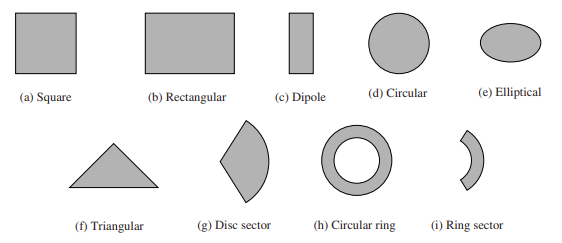

De nombreux substrats commerciaux sont disponibles pour la conception et la fabrication d'antennes de type microruban. Certains substrats courants sont listés dans le tableau ci-dessous, avec les paramètres les plus pertinents (nom de la société, nom du substrat, épaisseur, gamme de fréquences, constante diélectrique et tangente de perte).

Il existe de nombreux substrats pouvant être utilisés pour la conception d'antennes microruban, et leurs constantes diélectriques sont généralement de l'ordre de 2,2 ≤ $ϵ_r$ ≤ 12. Ceux qui sont les plus souhaitables pour une bonne performance d'antenne sont les substrats épais dont la constante diélectrique se situe dans la partie la plus basse de la gamme, car ils offrent un meilleur rendement, une plus grande bande passante, des champs peu liés pour le rayonnement dans l'espace, mais au détriment de la taille de l'élément. 



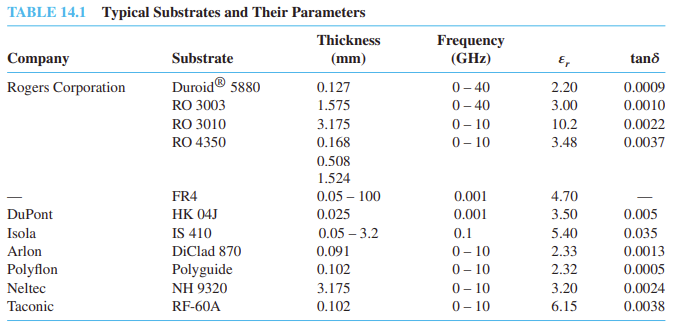

##Méthodes d'alimentation


> Alimentation par ligne microruban

> Alimentation avec cable coaxial

> Alimentation à couplage d'ouverture

> Alimentation à couplage de proximité


# **Antennas for Radar Communications**

## **Microstrip patch rectangulaire**




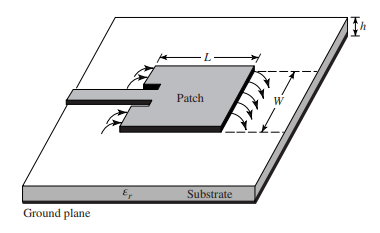


### Procédure de conception

**Spécifier:** $\epsilon_r$ , $f_r$(Hz) et h

**Déterminer:** W et L 



1.   Pour un radiateur efficace, une largeur pratique qui conduit à de bons rendements radiatifs est de:

>$  W = \dfrac{c}{2f_r} \cdot \sqrt{\dfrac{2}{ϵ_r + 1}}$

où c est la vitesse de la lumière dans l'espace libre.

2.    Déterminer la constante diélectrique effective de l'antenne microruban en utilisant:

> $ϵ_{reff} = \dfrac{ϵ_r+1}{2} + \dfrac{ϵ_r-1}{2}\left [ 1+12\frac{h}{W} \right ]^{-1/2}    $

3.    Une fois que W est trouvé, déterminez l'extension de la longueur $ΔL$ à l'aide de:

>$ΔL= 0.412h \dfrac{\left ( \epsilon_{reff}+0.3\right)\left ( \frac{W}{h}+0.264 \right )}{\left ( \epsilon_{reff}-0.258\right)  \left ( \frac{W}{h}+0.8 \right )}$

4.    La longueur réelle du patch peut maintenant être déterminée en résolvant:

>$ L = \dfrac{c}{2f_r \sqrt{ϵ_{reff}} } -2ΔL$

**Surface effective** 
> $ A_{eff} = G(\theta,\phi) \cdot \dfrac{\lambda^2}{4\pi} \cdot e_p $

**input impedance**

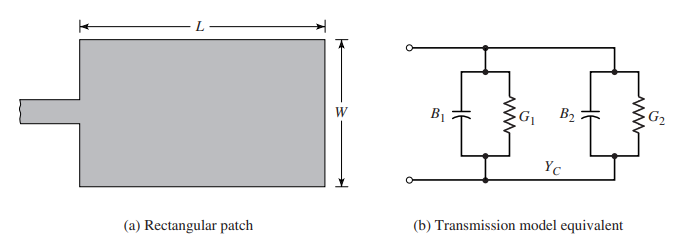

**Condutance G1**

> $G_1 = I_1 / 120 \pi^2 $

Ou

>$I_1 =  \displaystyle\int_{0}^{\pi } \left [ \dfrac{ \sin \left (\dfrac{k_0 W}{2} \cos \theta \right ) }{\cos \theta } \right ]^{2}\sin ^{3}(\theta)   d\theta   = -2 + \cos X + X S_i(X) + \frac{\sin (X)}{X} $

> $X = K_0 W$

La conductance mutuelle est définie, en termes de champs de zone lointaine comme suit:

> $G_{12} =  \frac{1}{120 \pi ^{2}} \displaystyle\int_{0}^{\pi } \left [ \dfrac{ \sin \left (\dfrac{k_0 W}{2} \cos \theta \right ) }{\cos \theta } \right ]^{2} J_0\left ( k_0  L \sin \theta  \right ) \sin ^{3} (\theta)  d\theta  $

**The resonant input resistance**

> $R_{in} = \dfrac{1}{2(G_1 + G_12)}$

**Approximate expression for the input impedance**

> $R_{in} = 90 * \dfrac{\left ( e_r \right )^{2}}{e_r-1} \cdot \dfrac{L}{W}$


Ref: Balanis, Constantine. “Microstrip Antennas.” Antenna Theory, 4nd Ed.

### Codes Design Parametres

In [ ]:
#import biblioteques
from typing import Hashable
from ipywidgets import interact
import numpy as np
import scipy.special as sc
from scipy.integrate import quad
import scipy.integrate as integrate
import scipy.special as special

In [ ]:
print( 'Definir les parametre h(mm), fr(GHz) et er:')
@interact(fc=(1, 20, 0.01), er=(2.2, 12, 0.01), h = (0.05, 5, 0.01,))
def dimension_patch_carre(fc,er,h):
  #vitesse de la lumiere
  c = 3*10**8
  #frequence centrale en GHz
  fc = fc*10**9
  #longueur de londe propage
  lamb = c/fc
  #epaisseur du substrate dieletrique
  h = h*10**(-3)
  #largueur du patch
  W = (c/(2*fc)) * np.sqrt(2/(er+1))

  ereff = (er+1)/2 + ((er-1)/2 * ((1+12*(h/W))**(-0.5)))

  DeltaL = 0.412*h * (((ereff+0.3)*((W/h) + 0.264)) / ((ereff-0.258)*((W/h)+0.8)))

  #Longueur du patch
  L = c/(2*fc*np.sqrt(ereff)) - 2*DeltaL

  print('Largeur du patch(W):',np.round(W*100,4),'cm\nLongueur(L):', np.round(L*100,4),'cm \n')

  #--------------Calcule de la impedance de entree------------------------------------------
  # constante de propagation
  K0 = (2*np.pi*fc)/c 
  x = K0*W

  Si =  integrate.quad(lambda t : (np.sin(t))/t, 0, x)[0]

  I = -2 + np.cos(x) + x*Si  + np.sin(x)/x
  G1 =  I/(120*np.pi**2)


  I122 = lambda teta : ((np.sin((K0*W)/2 * np.cos(teta)))/(np.cos(teta)))**2  * special.j0(K0*L*np.sin(teta)) * np.sin(teta)**3
  I12 = integrate.quad(I122,0 , np.pi)[0]
  G12 = 1/(120*np.pi**2) * I12


  Rin = 1/(2*(G1+G12))

  Rinn = 90 * ((er**2)/(er-1)) * (L/W)
  
  y0 =  L/np.pi * np.arccos(np.sqrt(50/Rin)) 

  print('Input impedance:',np.round(Rin,4),'Ohm ')
  print('Approximate Input impedance:',np.round(Rinn,4),'Ohm' )
  print('Approximate distance gap y0:', np.round(y0*100,4), 'cm')

Definir les parametre h(mm), fr(GHz) et er:


interactive(children=(FloatSlider(value=10.0, description='fc', max=20.0, min=1.0, step=0.01), FloatSlider(val…

In [ ]:
import pandas as pd
import numpy as np

def df_patch(D,G,ep,fr,S_11dB,Bp):
  lst1 = ["Surface effective mm²","Directivite","Gain",'Pertes de lantenne (ecd)', 'Pertes des désadaptation(dB)', 'Bande passante(GHz)','Bande passante(%)']
  #resultat de la simulation  
  c = 3*10**8
  fr = fr*10**9
  lamb = c/fr
  se = ((10**(G/10)) * (lamb**2)/(4*np.pi) * ep ) * 10**6
  ecd = G/D
  Bp_perc = ((Bp*10**9)/fr ) * 100
  lst2 = [se,D,G, ecd , S_11dB , Bp , Bp_perc]
  df = pd.DataFrame(list(zip(lst1,lst2)))
  print(df)

### [Simulation HFSS] Performances en rayonnement de l’antenne patch rectangulaire

---

### **Patch rectangulaire avec ligne de quart d'onde feed**

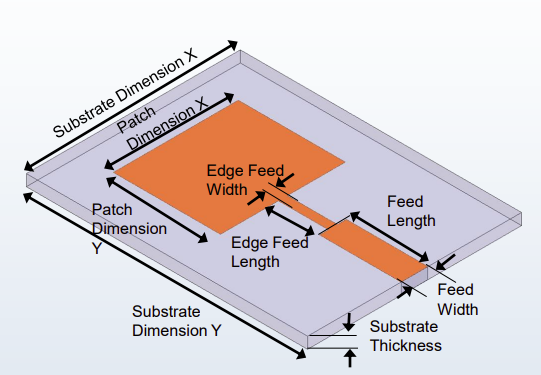

> Substrate FR4 avec $ϵ_r = 4.4$ avec tangente de perte $ξ = 0.02$ et $h = 0.1575 cm$

> Fréquence centrale de $10GHz$


### Performances en rayonnement

> Dimension du patch rectangulaire (L x W) théorique:
* L = 0.64 cm
* W = 0.91 cm

> Dimension du patch rectangulaire (L x W) après optimisation:
* L = 0.64 cm
* W = 0.70 cm


In [ ]:
df_patch(6.61,5.46,1, 10,-16.31, 0.5244)

                              0           1
0         Surface effective mm²  251.786619
1                   Directivite    6.610000
2                          Gain    5.460000
3      Pertes de lantenne (ecd)    0.826021
4  Pertes des désadaptation(dB)  -16.310000
5           Bande passante(GHz)    0.524400
6             Bande passante(%)    5.244000


Critères de performance                | Résultats 
---------------------------------------|----------------------
Surface effective Se                   | 251.78 $mm^2$ 
Directivité($Φ=90°,Θ=0°$)              | 6.61 dBi 
Gain($Φ=90°,Θ=0°$) (dBi)               | 5.46 dBi
Pertes de l’antenne ($e_{cd}$)         | 0.8260 
Pertes des désadaptions ($S_{11}$)     | -16.31 dB 
Bande passante (-10 dB)                | 0.524 GHz 
Bande passante (%)                     | 5.24% 




> Caractéristiques de l'antenne

Directivité        | Polarisation      | Bande passante
-------------------|-------------------|-----------------
Moyen              | Linéaire          | Étroite



### Paramètre $s_{11}$ : Coefficient de réflexion

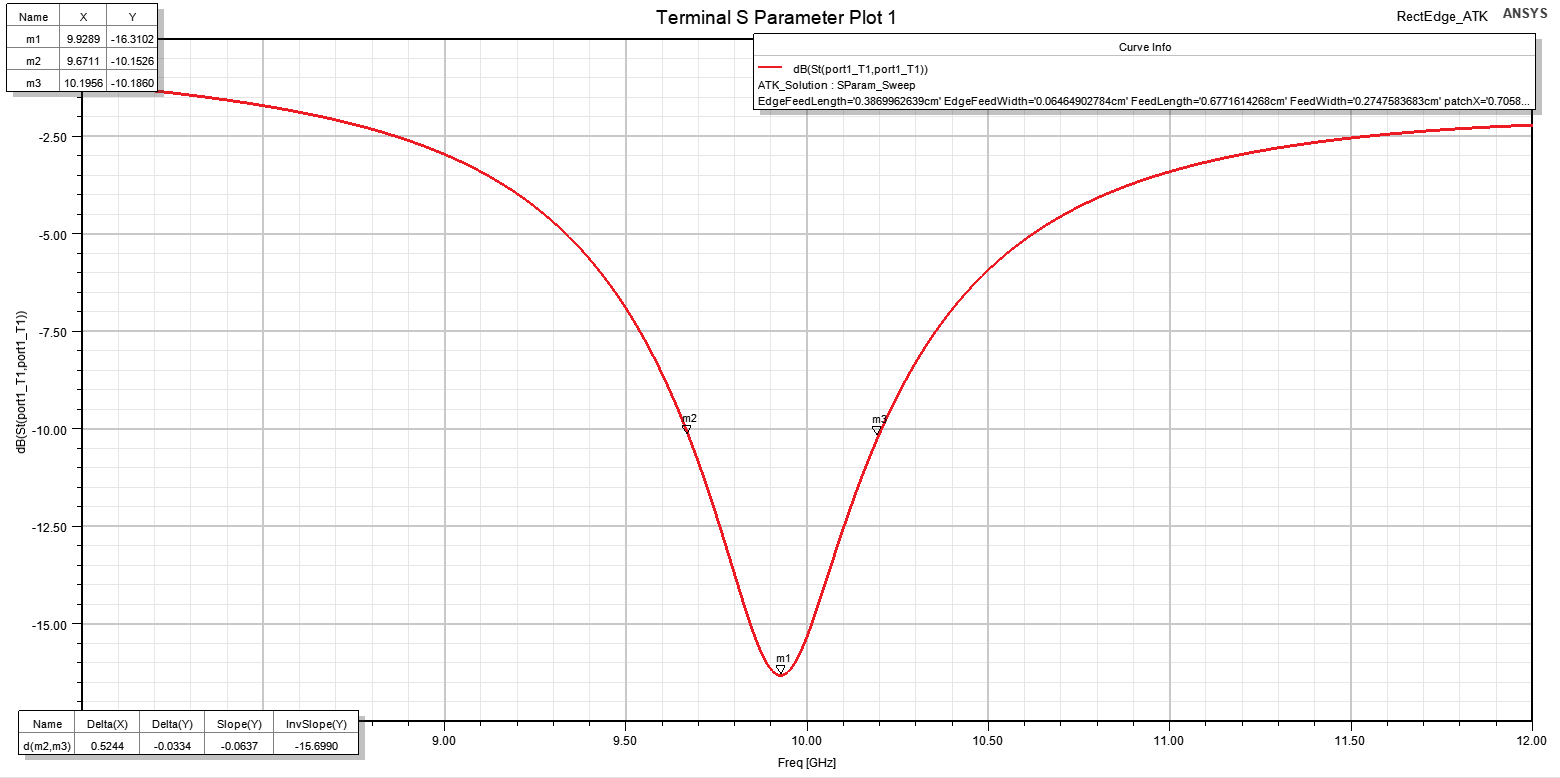

### Diagramme de rayonnement

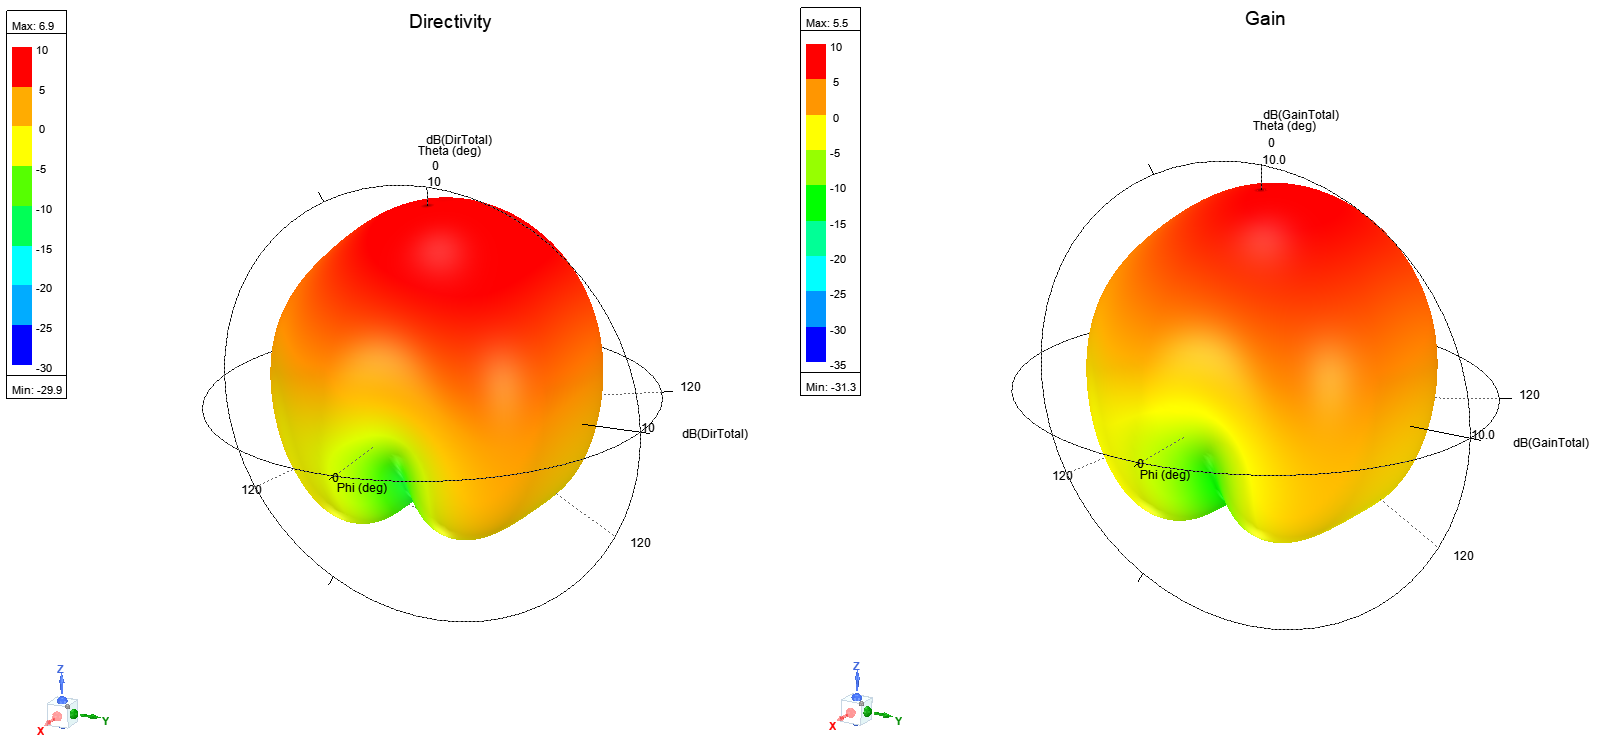

explicar que atinge o ponto de max ganho quando teta tem uma defazagem de 10 graus.

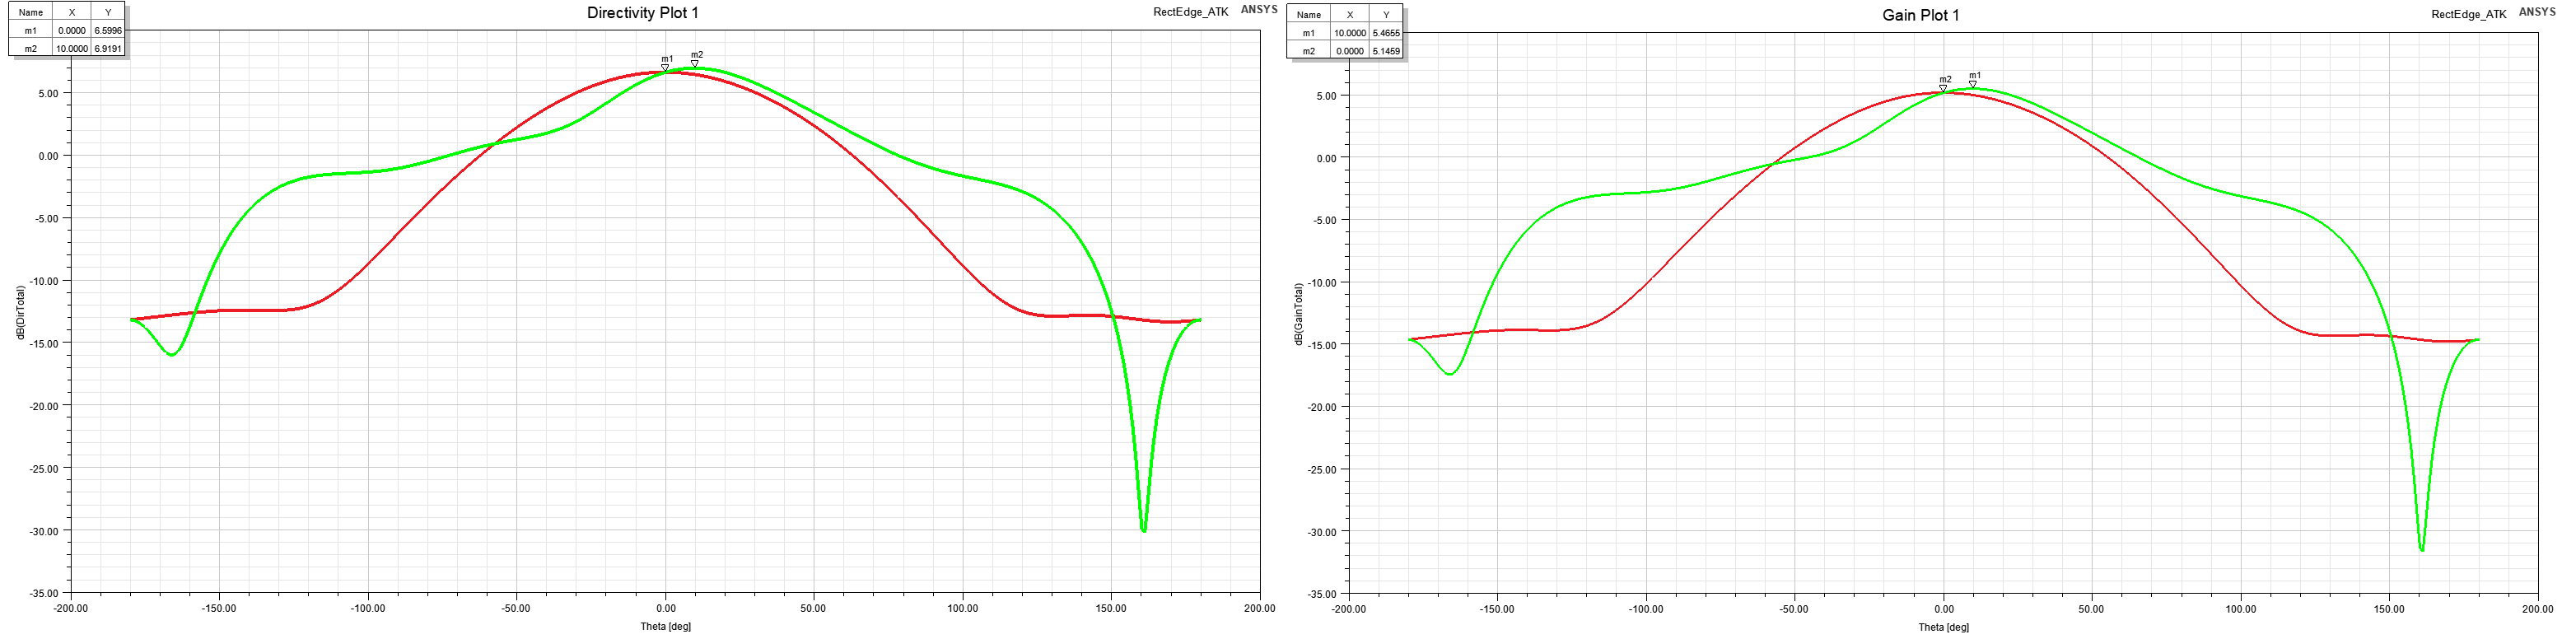

### **Patch rectangulaire avec insert feed**

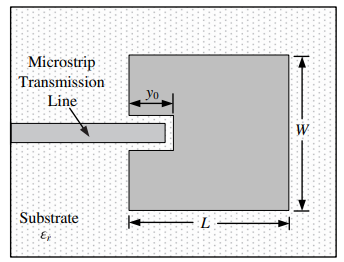

 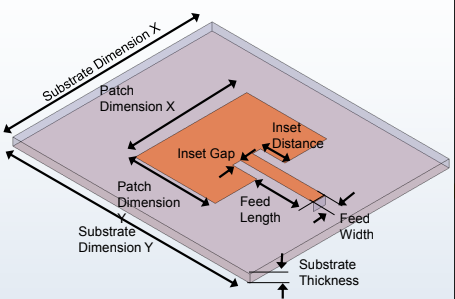

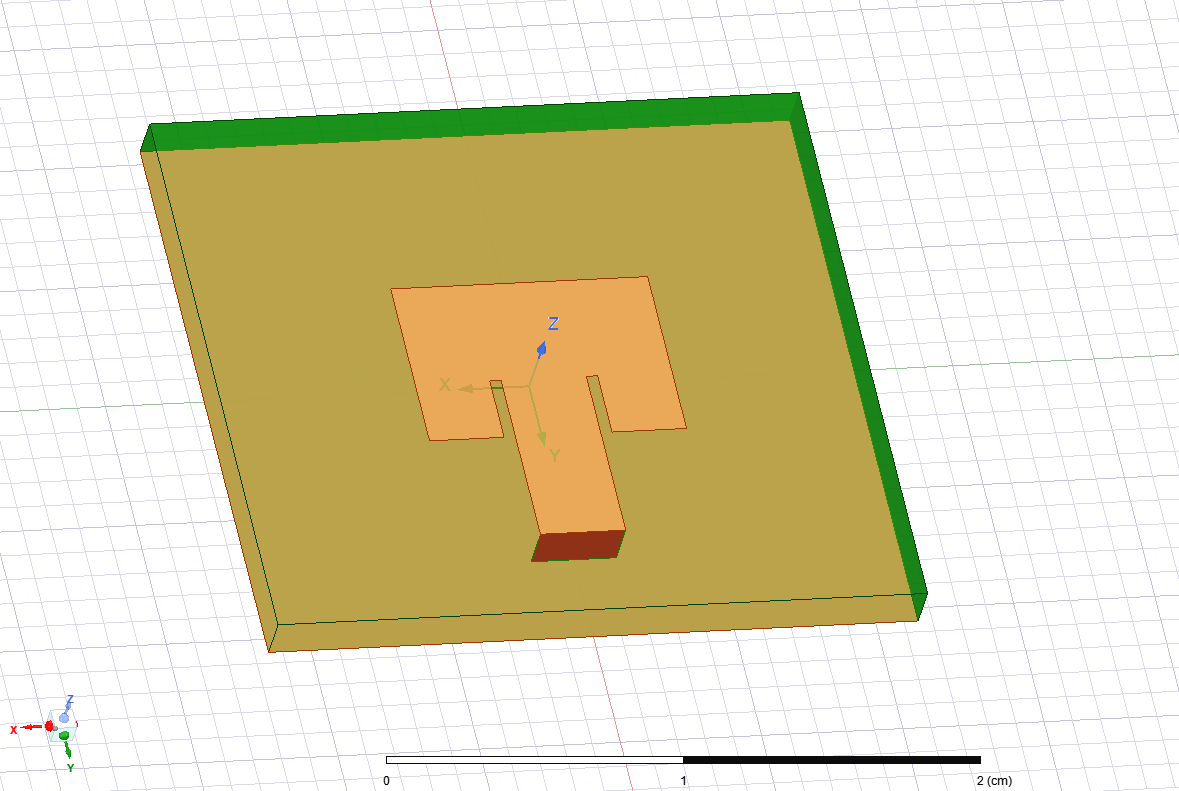

### Performances en rayonnement

* Substrate FR4 avec $ϵ_r = 4.4$ avec tangente de perte $ξ = 0.02$ et $h = 0.1575 cm$

* Fréquence centrale de $10GHz$

* L = 0.64 cm
* W = 0.91 cm
* $y_0 = 0.2372 cm$

> Dimension du patch rectangulaire (L x W) aprés optimisation:

* L = 0.64 cm
* W = 0.70 cm 
* Inset gap =  cm


In [ ]:
df_patch(6.6210,5.2266,1, 10,-19.2317, 0.4444)

                              0           1
0         Surface effective mm²  238.612200
1                   Directivite    6.621000
2                          Gain    5.226600
3      Pertes de lantenne (ecd)    0.789397
4  Pertes des désadaptation(dB)  -19.231700
5           Bande passante(GHz)    0.444400
6             Bande passante(%)    4.444000


Critères de performance                | Résultats 
---------------------------------------|----------------------
Surface effective Se                   | 238.61 $mm^2$ 
Directivité($Φ=90°,Θ=0°$)              | 6.62 dBi 
Gain($Φ=90°,Θ=0°$) (dBi)               | 5.23 dBi
Pertes de l’antenne ($e_{cd}$)         | 0.7893 
Pertes des désadaptions ($S_{11}$)     | -19.2317 dB 
Bande passante (-10 dB)                | 0.4444 GHz 
Bande passante (%)                     | 4.44% 




> Caractéristiques de l'antenne

Directivité        | Polarisation      | Bande passante
-------------------|-------------------|-----------------
Moyen              | Linéaire          | Étroite


### Paramètre $s_{11}$ : Coefficient de réflexion

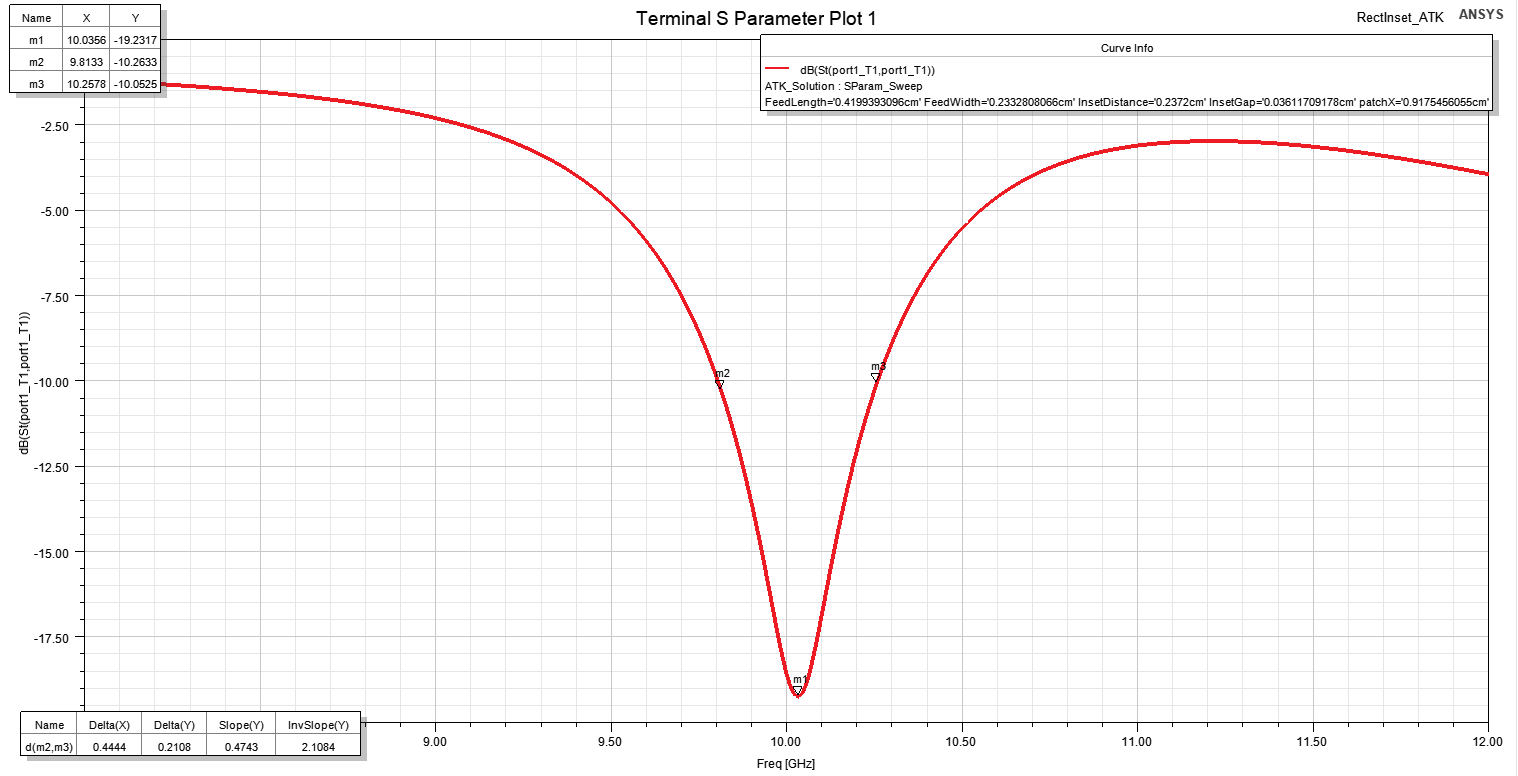

### Diagramme de rayonnement

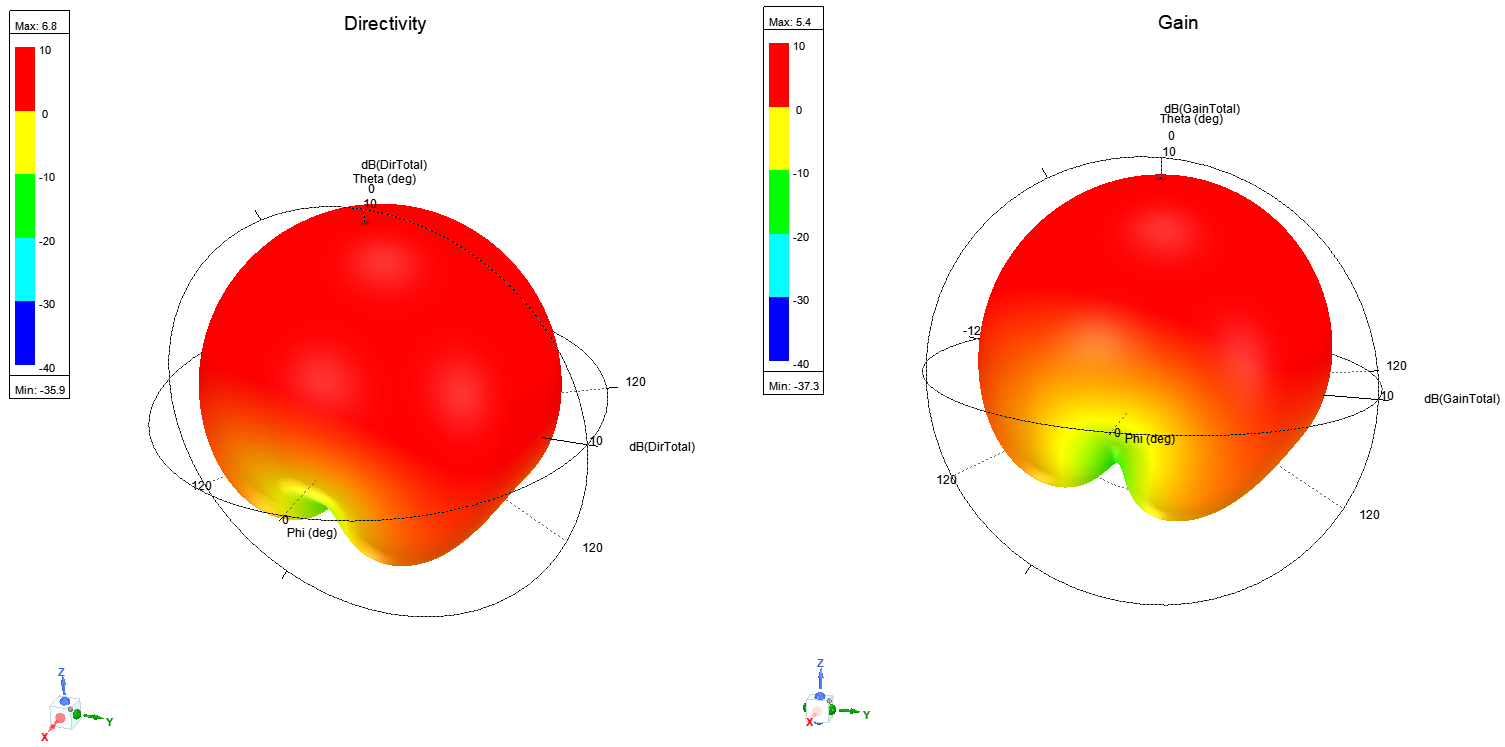

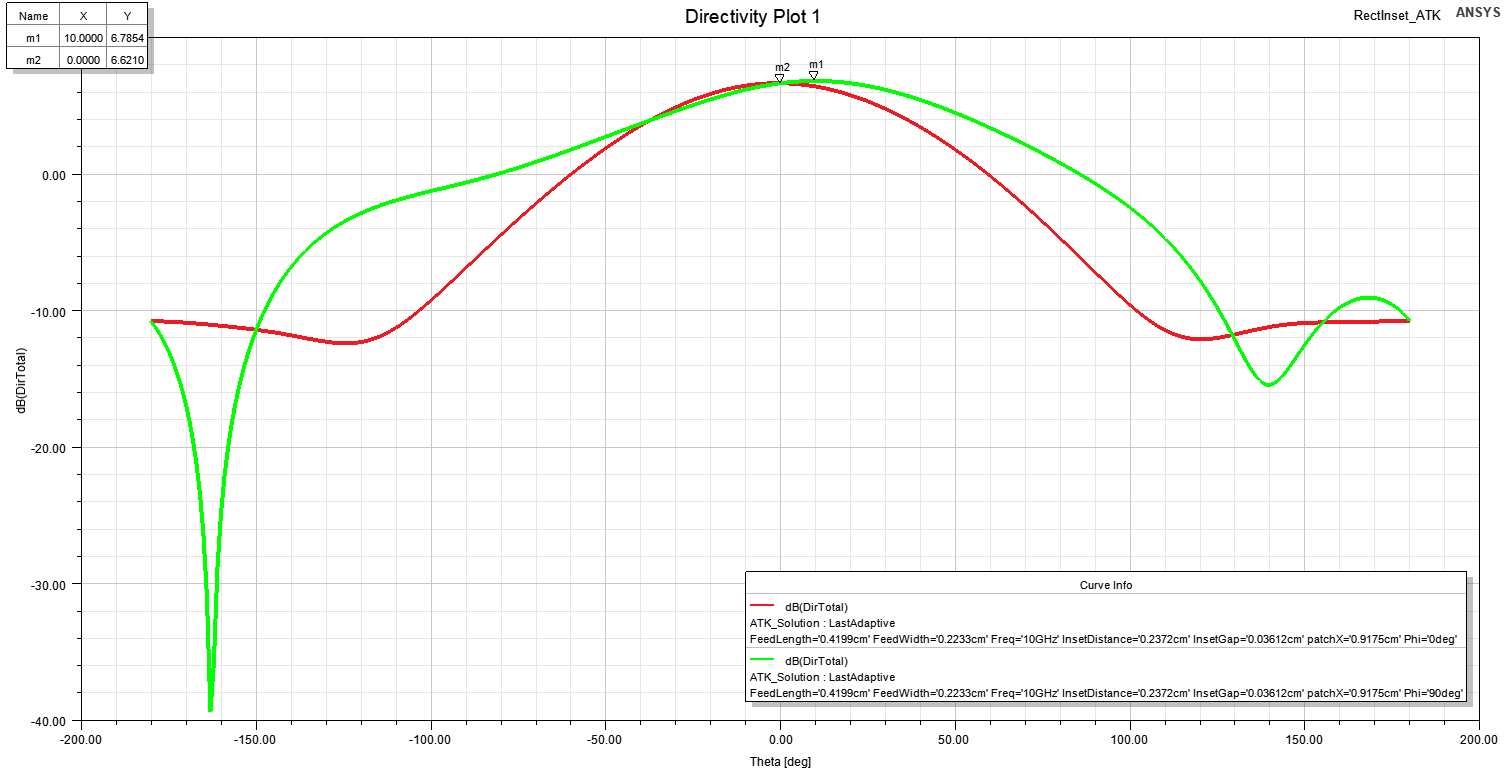

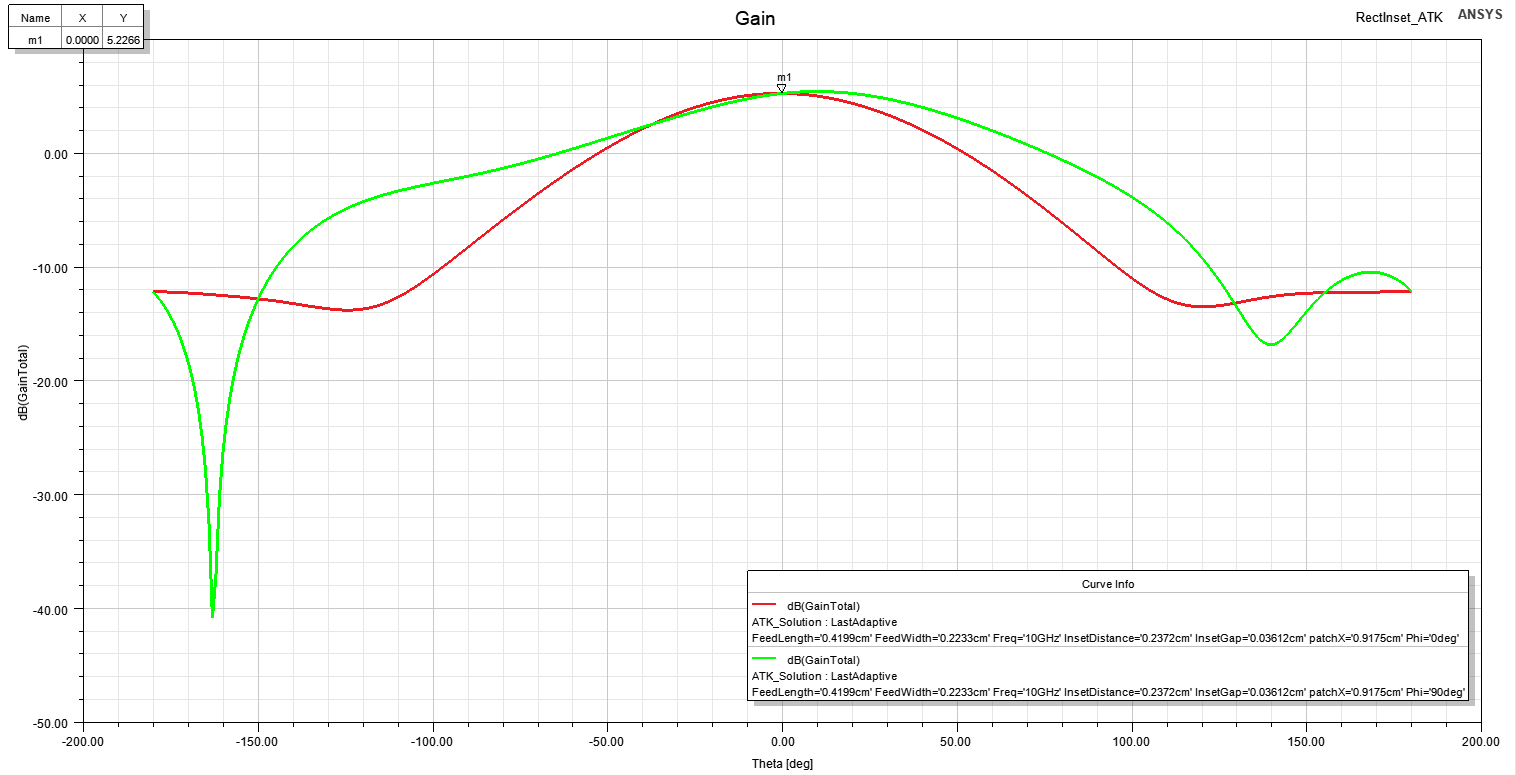

### **Patch rectangulaire avec coaxial feed**





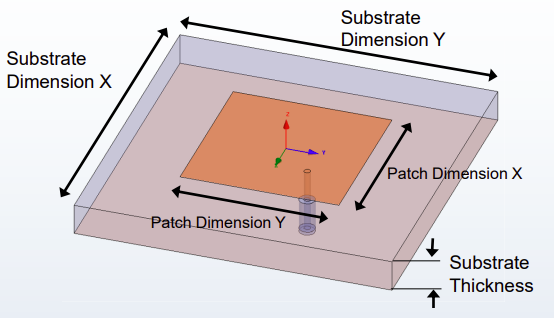

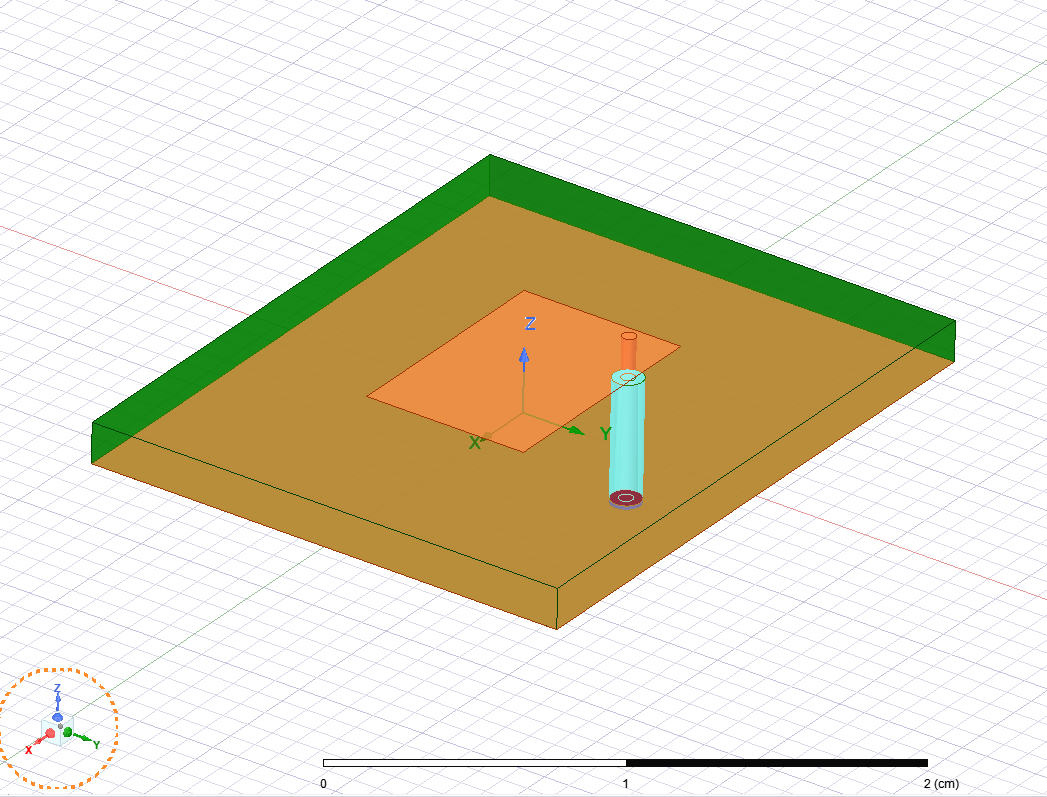

###Performances en rayonnement


* Substrate FR4 avec $ϵ_r = 4.4$ avec tangente de perte $ξ = 0.02$ et $h = 0.1575 cm$

* Fréquence centrale de $10GHz$


Dimension (L x W)                      | 0.64 cm x 0.91 cm 
---------------------------------------|----------------------
Surface effective Se                   | 306.69 $mm^2$ 
Directivité($Φ=90°,Θ=0°$)              | 7.2135 dBi 
Gain($Φ=90°,Θ=0°$) (dBi)               | 6.5234 dBi
Pertes de l’antenne ($e_{cd}$)         | 0.9262 
Pertes des désadaptions ($S_{11}$)     | -25.8583 dB 
Bande passante (-3 dB)                 | 0.248 GHz 
Bande passante (%)                     | 2.48%' 




> Caractéristiques de l'antenne

Directivité        | Polarisation      | Bande passante
-------------------|-------------------|-----------------
Moyen              | Linéaire          | Étroite

### Paramètre  s11  : Coefficient de réflexion

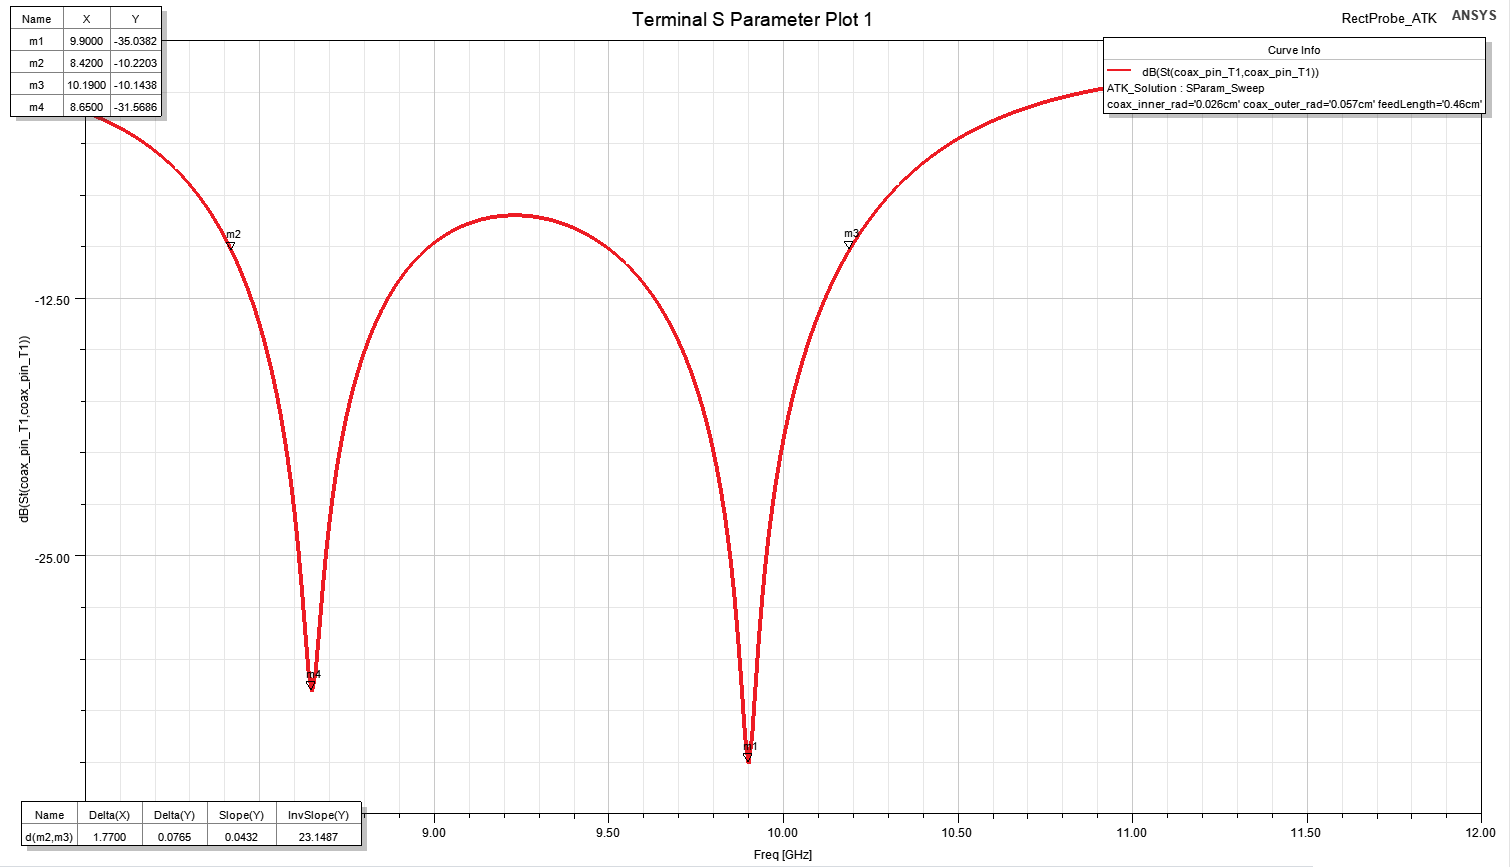

###Diagramme de rayonnement

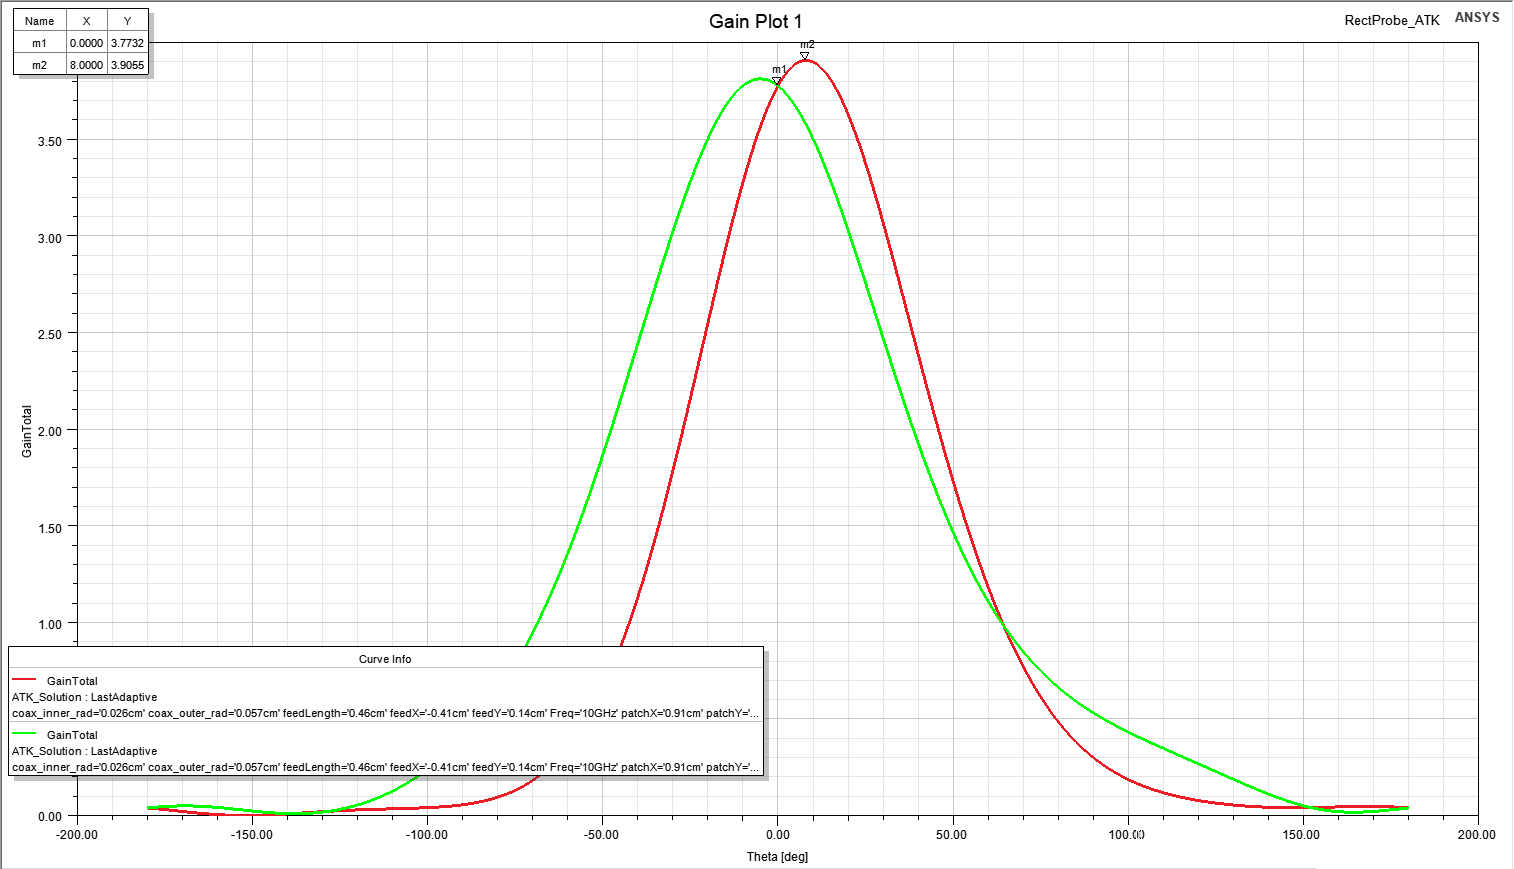

## **Microstrip patch circulaire**



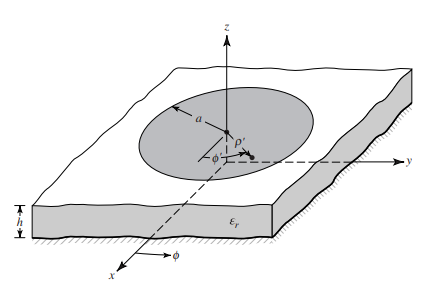

### Procédure de conception

**Spécifier:** $\epsilon_r$ , $f_r$(Hz), et h

**Déterminer:** le rayon **a** du patch 

> $a = \dfrac{F}{\left \{ 1+\dfrac{2h}{\pi \epsilon_r F} \left [ \ln \left ( \dfrac{\pi F}{2h} \right )  + 1.7726\right ] \right  \}^{1/2}}$



> $ F = \dfrac{8.791 \cdot 10^9}{fr \sqrt{ϵ_r}}$



Ref: Balanis, Constantine. “Microstrip Antennas.” Antenna Theory, 4nd Ed.

### Codes - Design parametres

In [ ]:
print( 'Definir les parametre h(mm), fr(GHz) et er:')
@interact(fc=(1, 20, 0.05), err=(2.2, 12, 0.01), h = (0.05, 5, 0.01))
def dimension_patch_circulaire(fc,err,h):
  c = 3*10**8
  fc = fc*10**9
  hh = h*10**(-3)
  #---------------------------------------------------------------------------
  F = (8.791*10**9)/(fc*np.sqrt(err))

  a = F / ( 1 + ((2*hh)/(np.pi*err*F)) * ((np.log((np.pi*F)/(2*hh))) + 1.7726) )**(0.5)

  print('Rayon du patch:',np.round(a,4),'cm\n')

Definir les parametre h(mm), fr(GHz) et er:


interactive(children=(FloatSlider(value=10.0, description='fc', max=20.0, min=1.0, step=0.05), FloatSlider(val…

### [Simulation HFSS] Performances en rayonnement de l’antenne patch circulaire

---

### Patch circulaire avec coaxial feed

 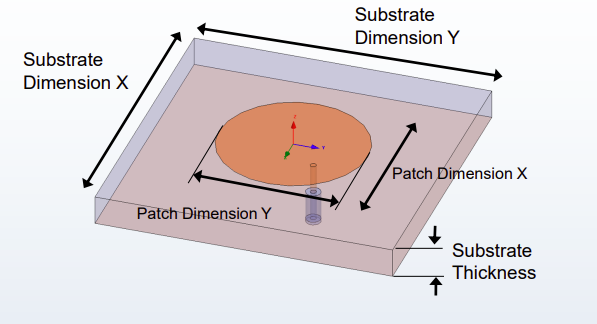

> Substrate FR4 avec $ϵ_r = 4.4$ avec tangente de perte $ξ = 0.02$ et $h = 0.1575 cm$

> Fréquence centrale de $10GHz$


### Performances en rayonnement

> Dimensions théoriques de l'antenne patch circulaire:
*  rayon a = 0.4182 cm

> Dimensions de l'antenne patch circulaire après optimisation:
*  rayon a = 0.3673 cm

In [ ]:
df_patch(6.4068,5.6051,1,10,-18.6354,0.6578)

                              0           1
0         Surface effective mm²  260.341046
1                   Directivite    6.406800
2                          Gain    5.605100
3      Pertes de lantenne (ecd)    0.874867
4  Pertes des désadaptation(dB)  -18.635400
5           Bande passante(GHz)    0.657800
6             Bande passante(%)    6.578000


Critères de performance                | Résultats 
---------------------------------------|----------------------
Surface effective Se                   | 260.3410 $mm^2$
Directivité($Φ=90°,Θ=0°$)              | 6.4068 dBi
Gain($Φ=90°,Θ=0°$)                     | 5.6051 dBi
Pertes de l’antenne ($e_{cd}$)         | 0.8749
Pertes des désadaptions ($S_{11}$)     | -18.6354
Bande passante (-3 dB)                 | 0.6578 GHz 
Bande passante (%)                     | 6.5780 % 


> Caractéristiques de l'antenne

Directivité        | Polarisation      | Bande passante
-------------------|-------------------|-----------------
Moyen              | Linéaire          | Étroite

### Paramètre $s_{11}$ : Coefficient de réflexion

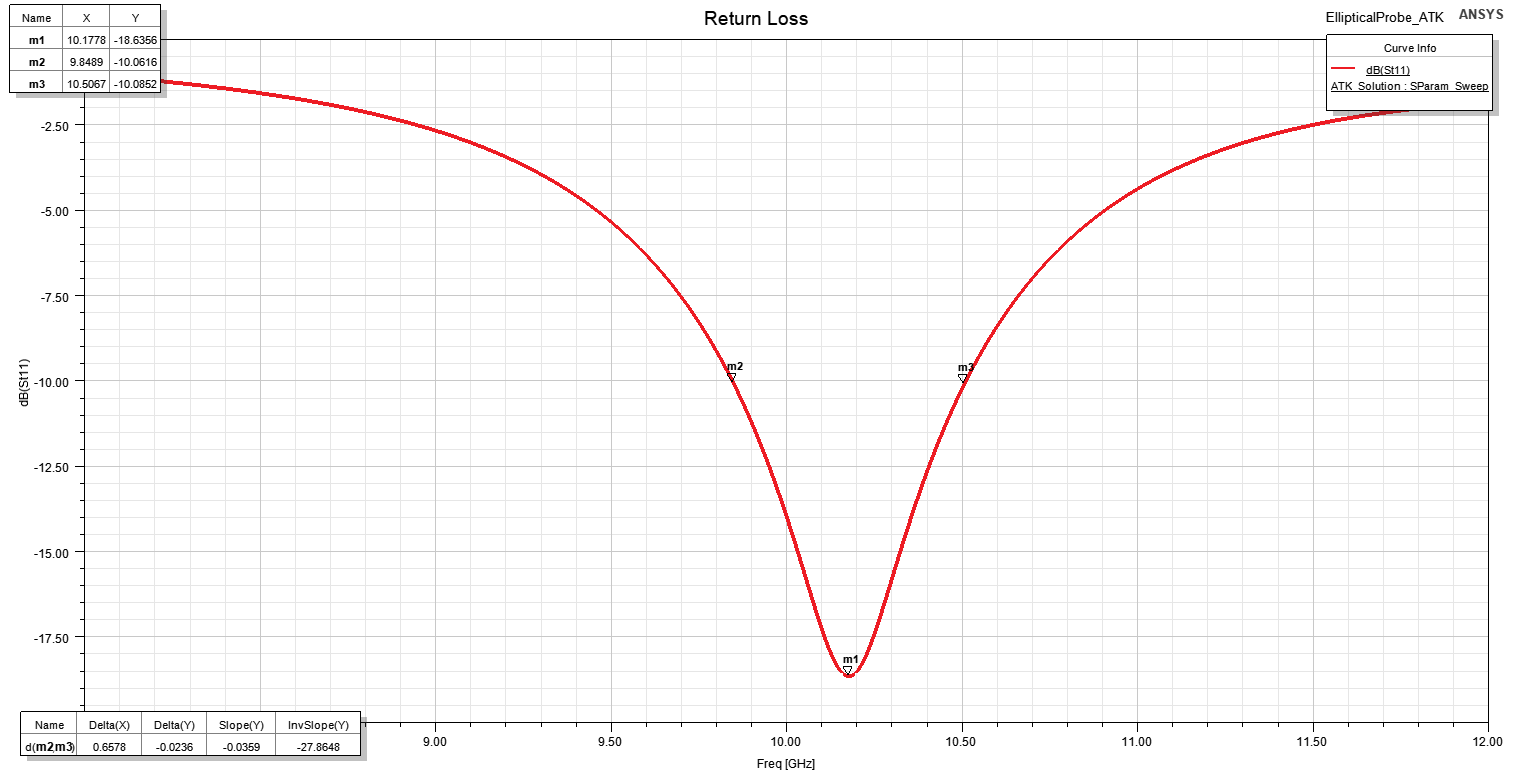

### Diagramme de rayonnement

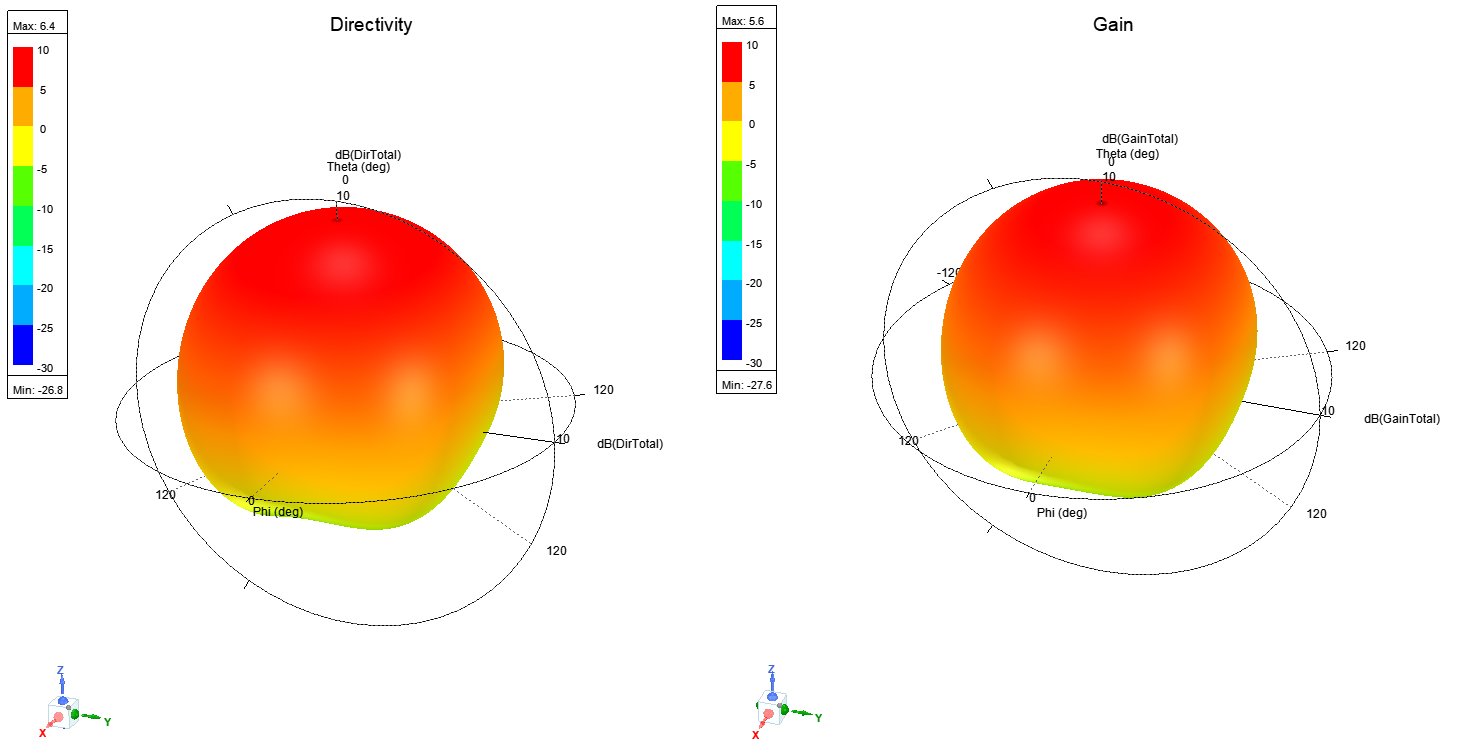

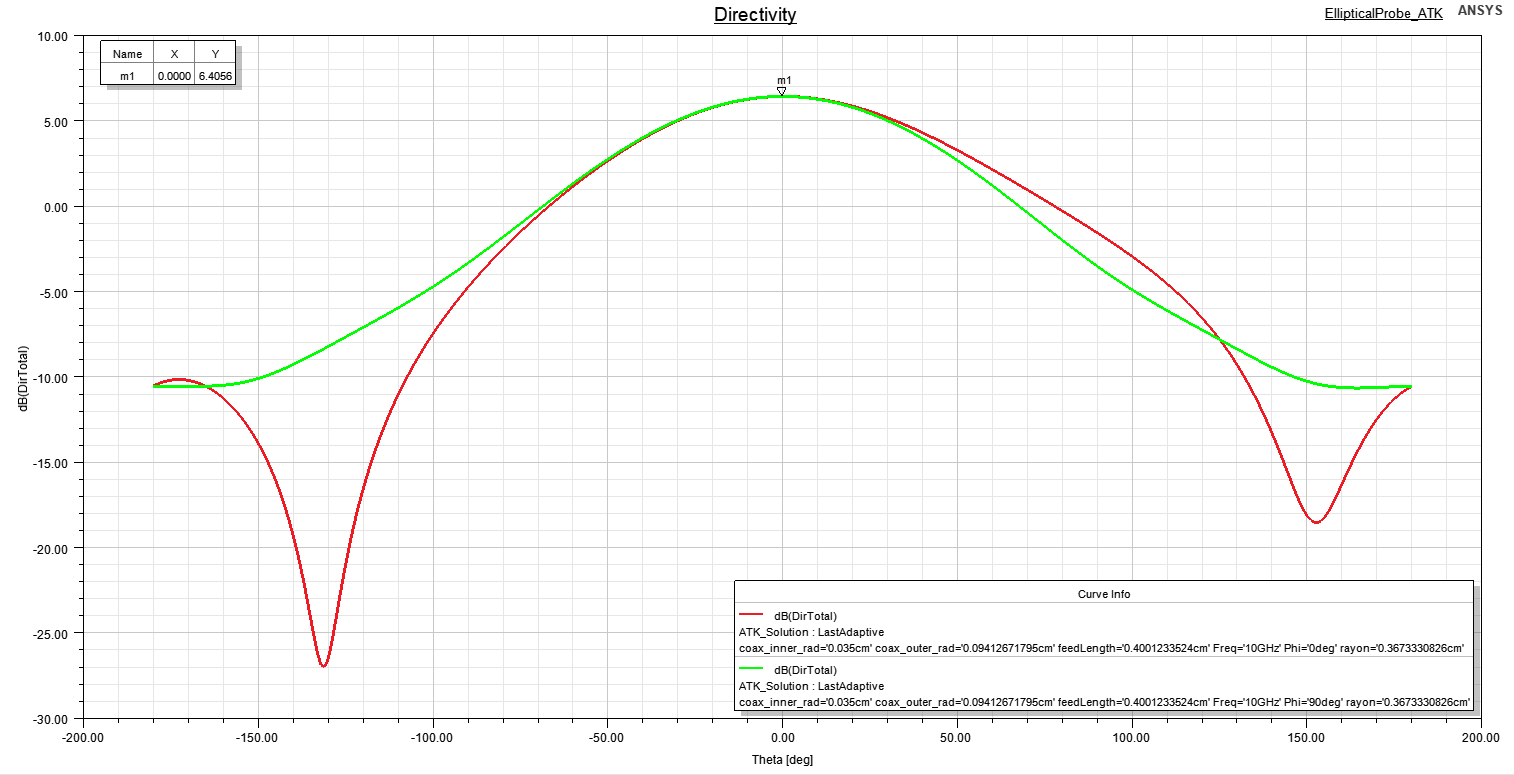

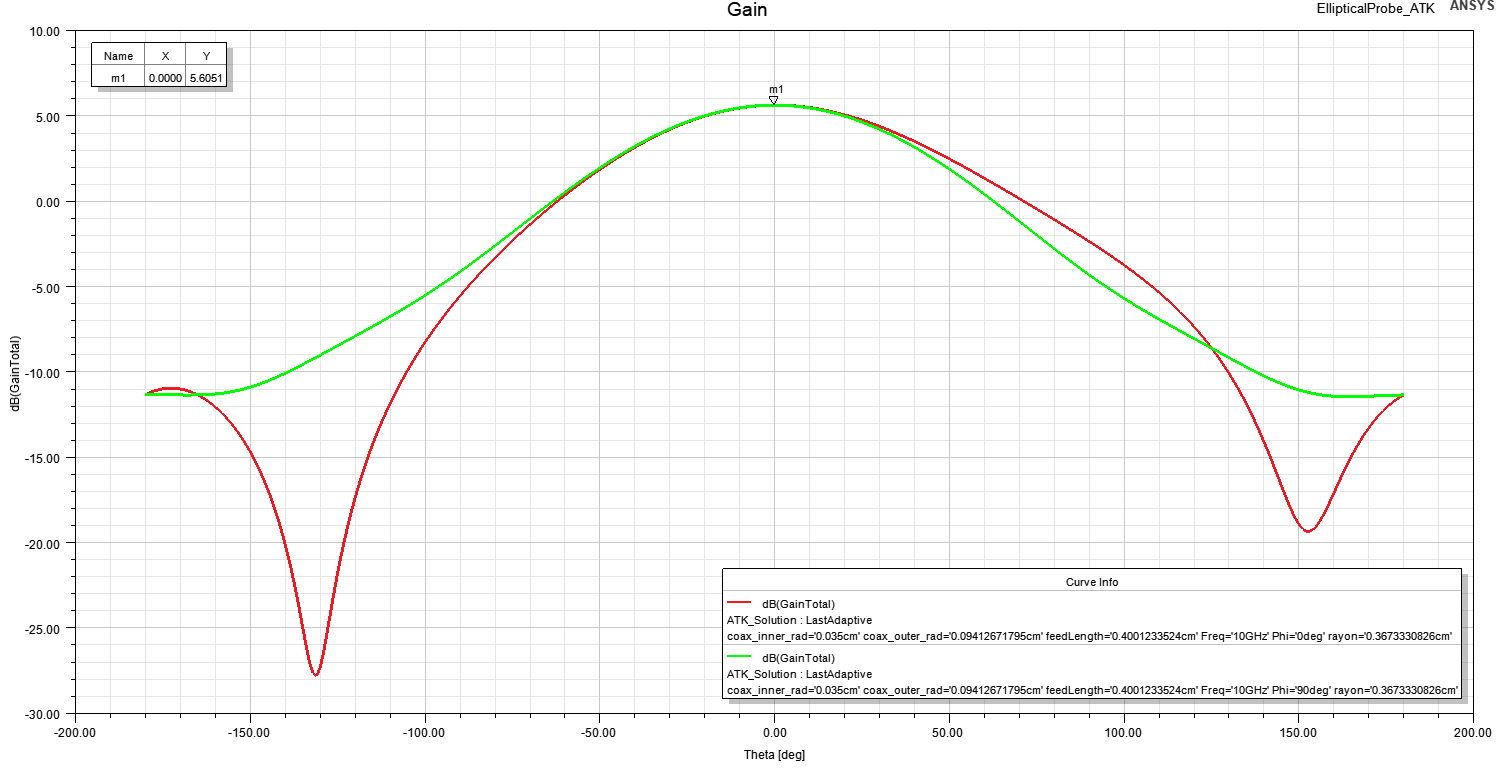

## **Microstrip Elliptical Patch**

### Procédure de conception

### Patch Elliptique avec coaxial feed layout

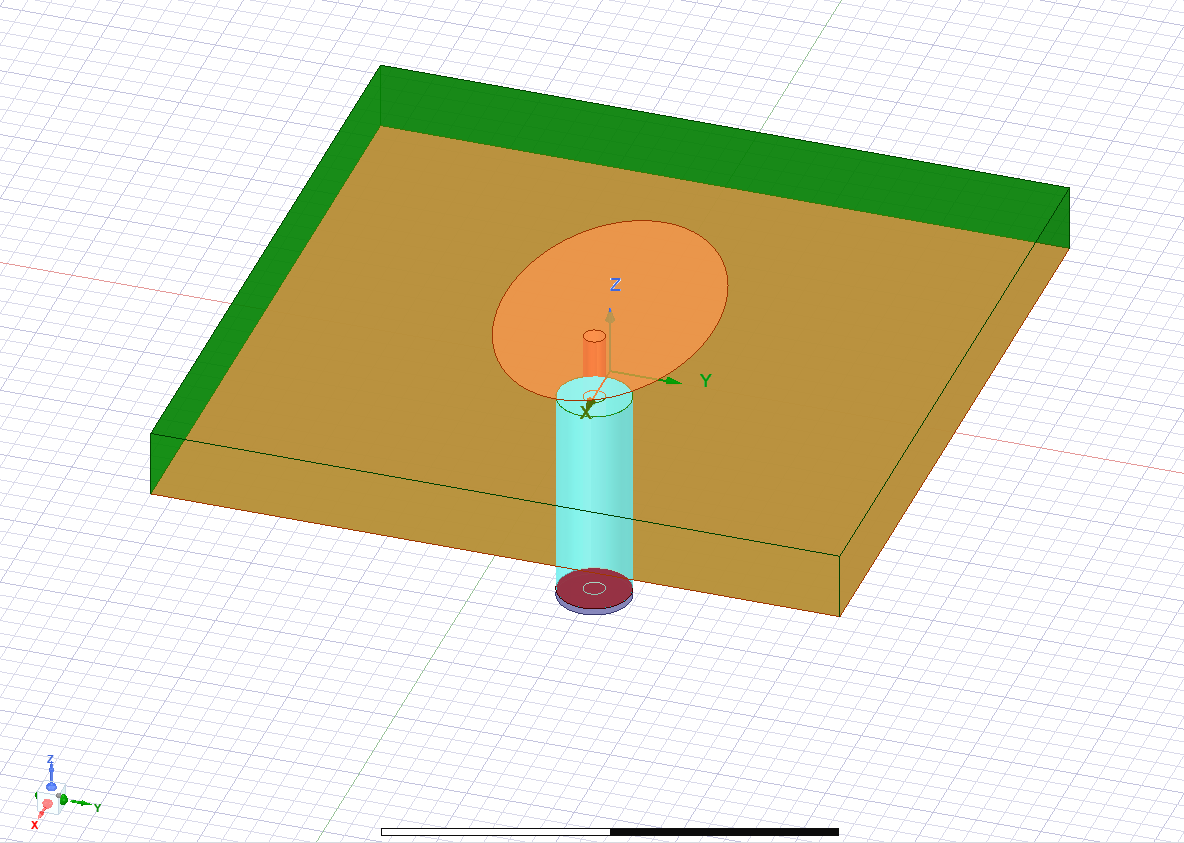

> Substrate FR4 avec $ϵ_r = 4.4$ avec tangente de perte $ξ = 0.02$ et $h = 0.1575 cm$

> Fréquence centrale de $10GHz$

### Performances en rayonnement

In [ ]:
df_patch(6.3388,5.3728,1,10,-31.88,0.6222)

                              0           1
0         Surface effective mm²  246.781526
1                   Directivite    6.338800
2                          Gain    5.372800
3      Pertes de lantenne (ecd)    0.847605
4  Pertes des désadaptation(dB)  -31.880000
5           Bande passante(GHz)    0.622200
6             Bande passante(%)    6.222000


Critères de performance                | Résultats 
---------------------------------------|----------------------
Surface effective Se                   | 246.78 $mm^2$
Directivité($Φ=90°,Θ=0°$)              | 6.3388 dBi
Gain($Φ=90°,Θ=0°$)                     | 5.3728 dBi
Pertes de l’antenne ($e_{cd}$)         | 0.8476
Pertes des désadaptions ($S_{11}$)     | -31.88 dB
Bande passante (-3 dB)                 | 0.6622 GHz 
Bande passante (%)                     |  6.22 % 


> Caractéristiques de l'antenne

Directivité        | Polarisation      | Bande passante
-------------------|-------------------|-----------------
Moyen              | Linéaire          | Étroite

### Codes Design Parametres

### [Simulation HFSS] Performances en rayonnement de l’antenne Elliptical

### Paramètre $s_{11}$ : Coefficient de réflexion

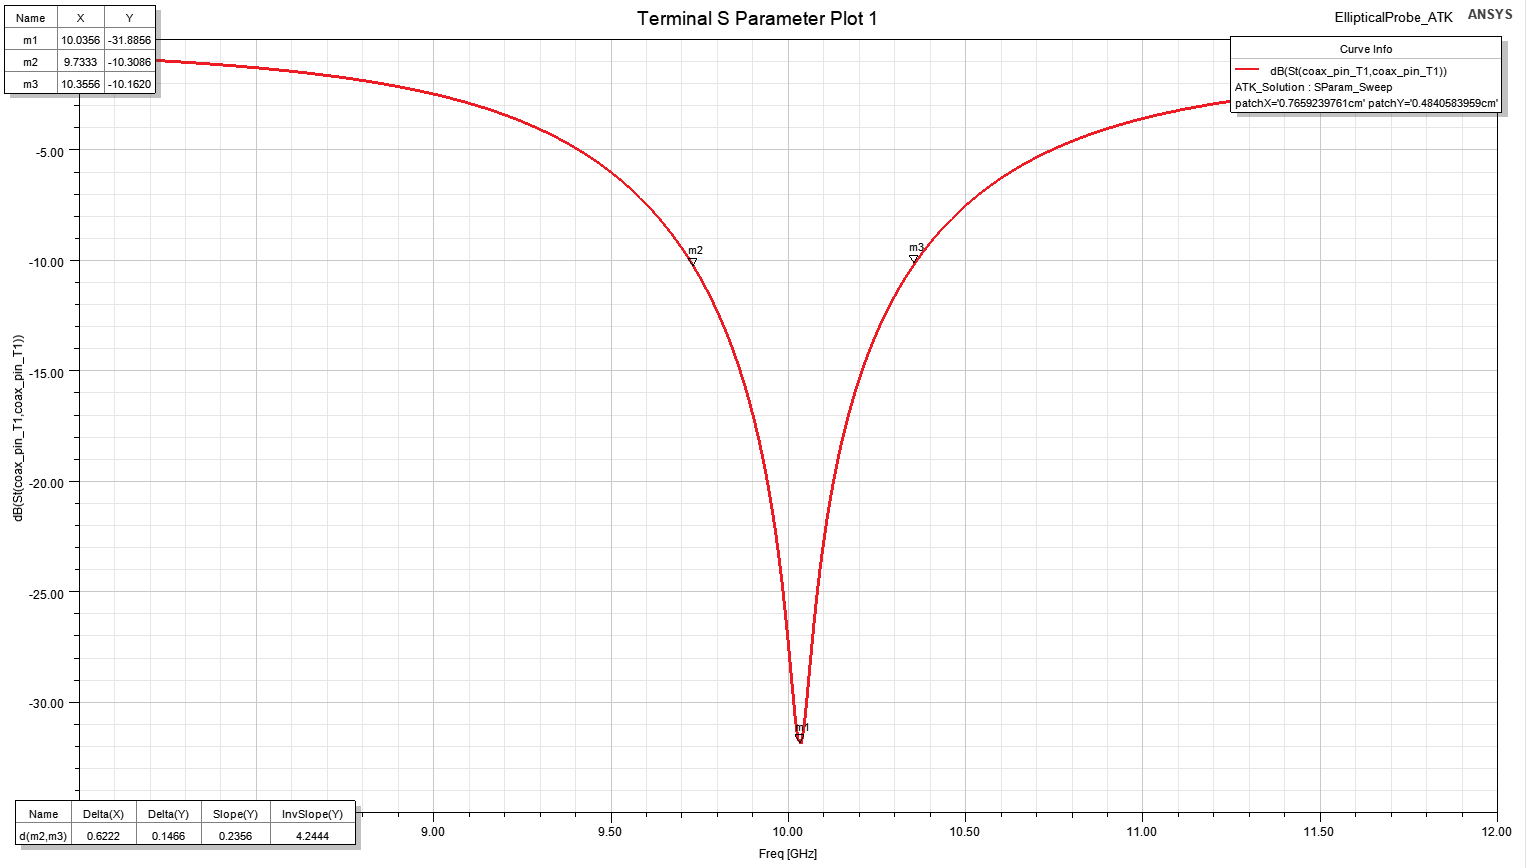

### Diagramme de rayonnement

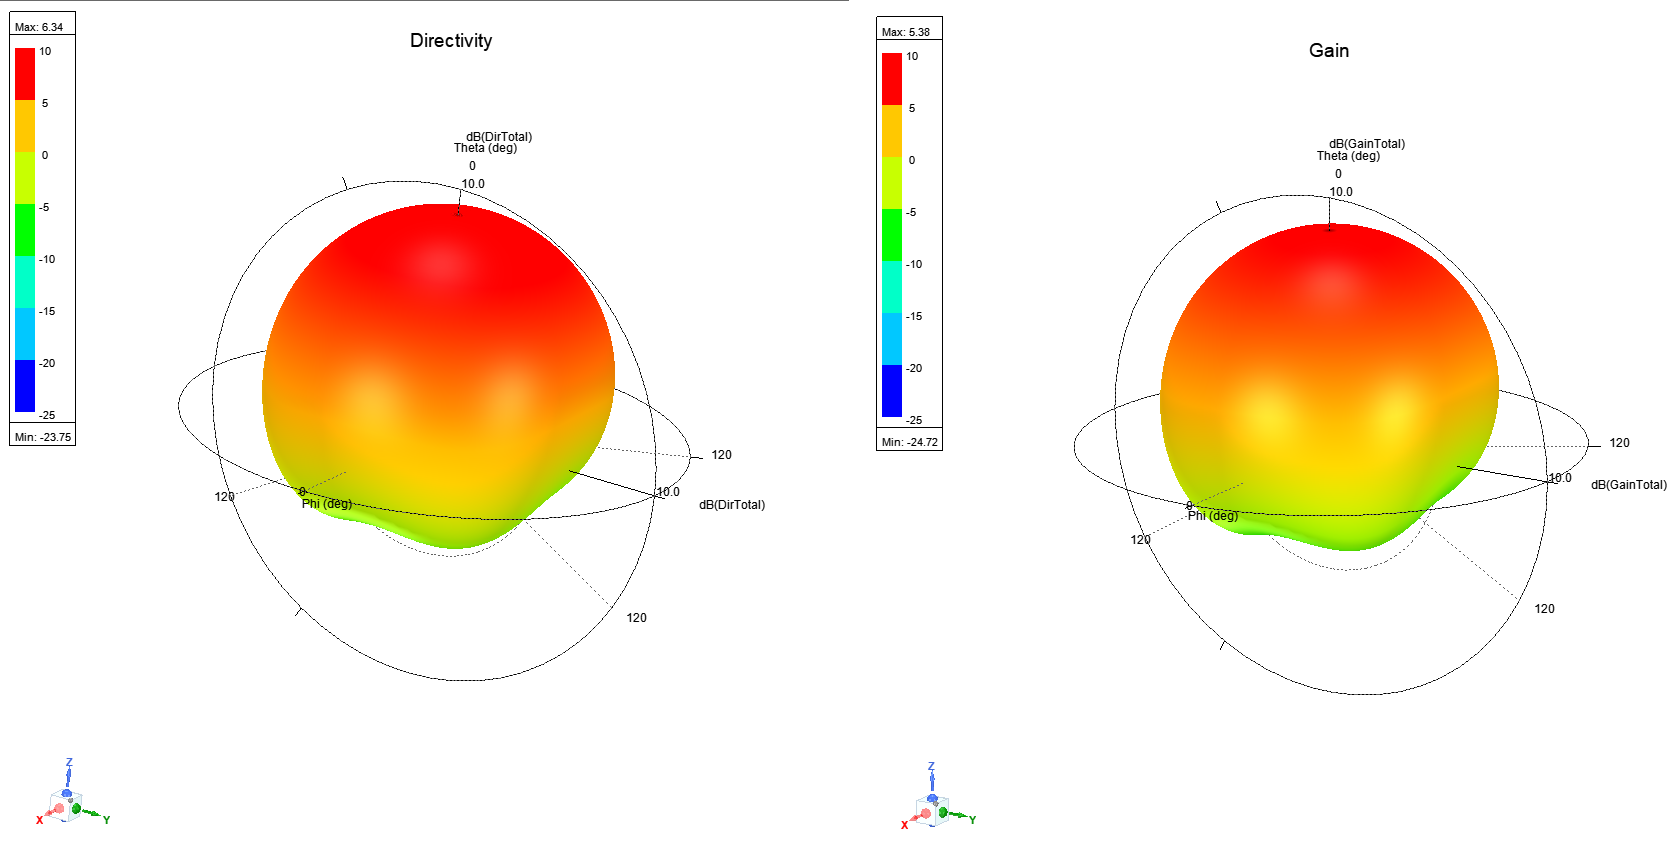

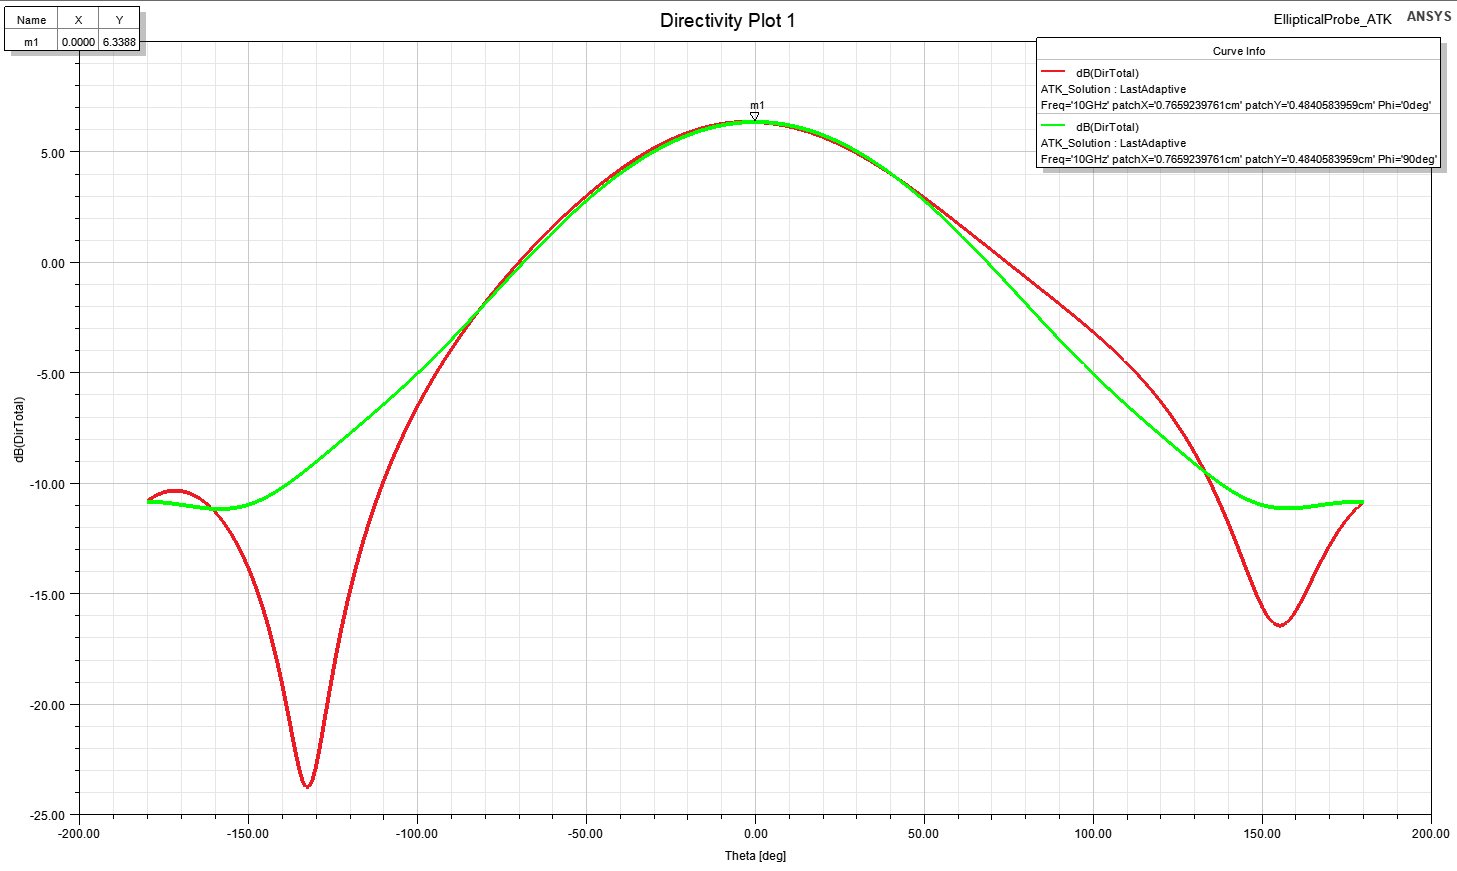

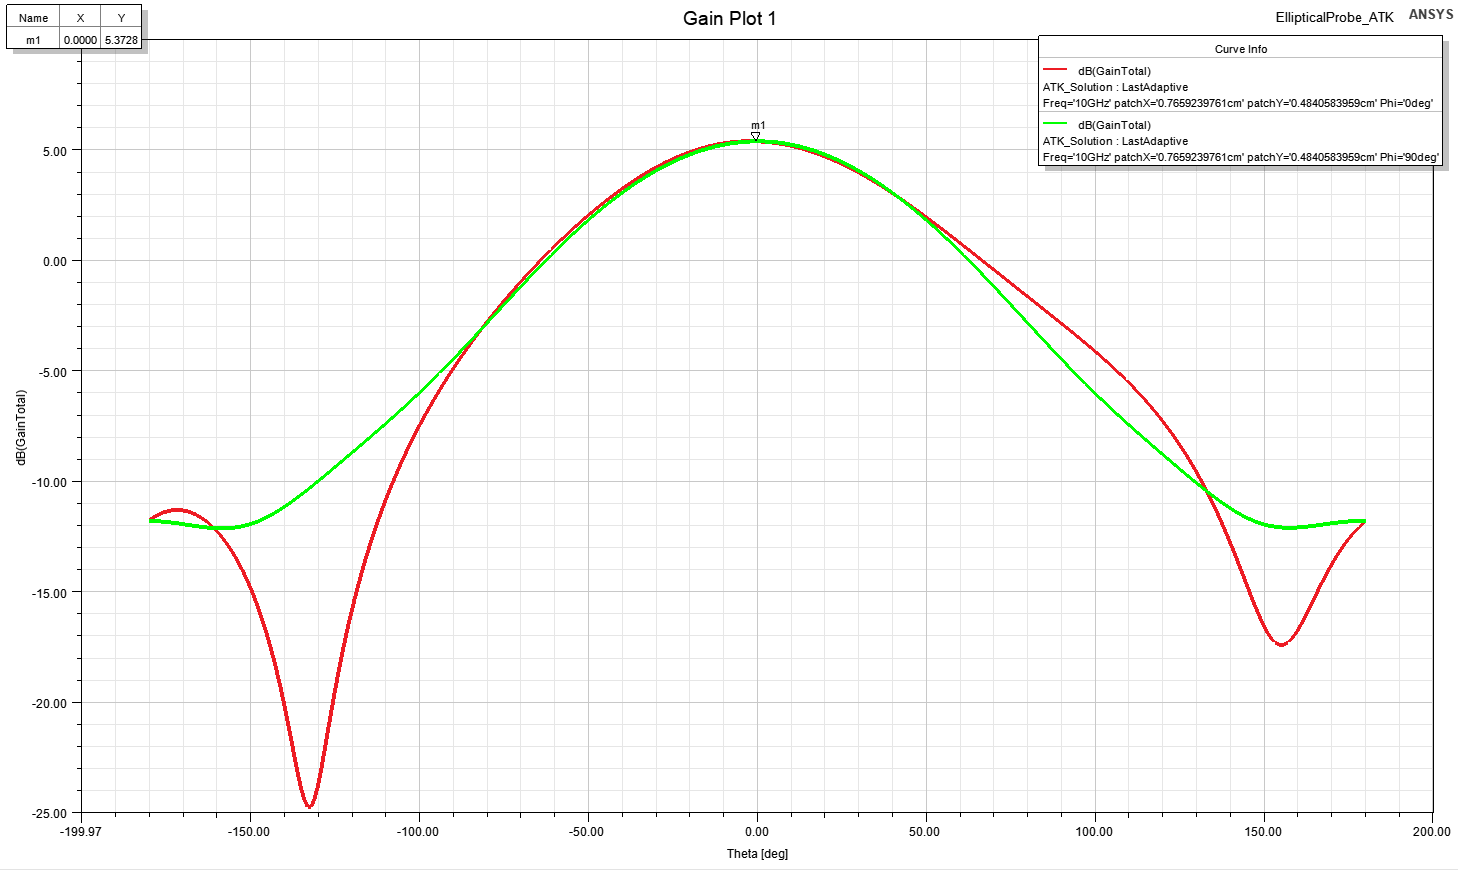

### Broadband Techniques for microstrip patch antenna


> Microstrip patch antenna with L-shaped probe


>  Probe-fed dual-stacked patches. A dual-stacked patch configuration: Maximum BW of 25% has been achieved by this configuration


> Aperture-coupled slot-fed dual-stacked patches.

> Use a coax probe feed with a U-slot


Ref: Modern handbook antenna chapither 4.

## **Quasi yagi**


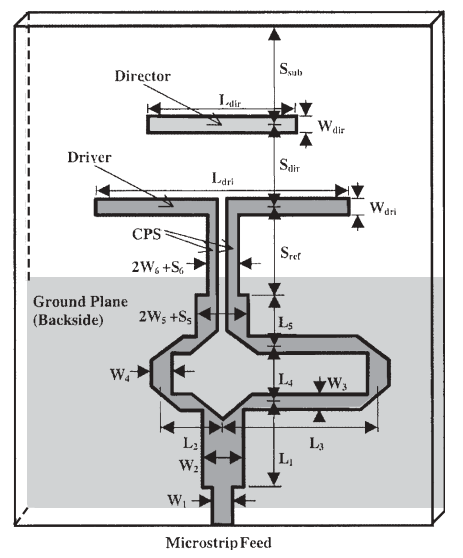

Ces dernières années, les antennes Yagi imprimées sont devenues populaires pour les applications à haute fréquence et à ondes millimétriques, et le nombre d'études est important. Cependant, elles visent principalement deux objectifs différents : le gain élevé et les performances à large bande. 

Ces antennes utilisent des alimentations non conventionnelles, essentiellement différentes formes de lignes microruban qui peuvent être imprimées sur une face d'un substrat diélectrique. Une telle conception facilite la fabrication d'antennes à des fréquences micro-ondes et millimétriques élevées.


## **Vivaldi antenne**

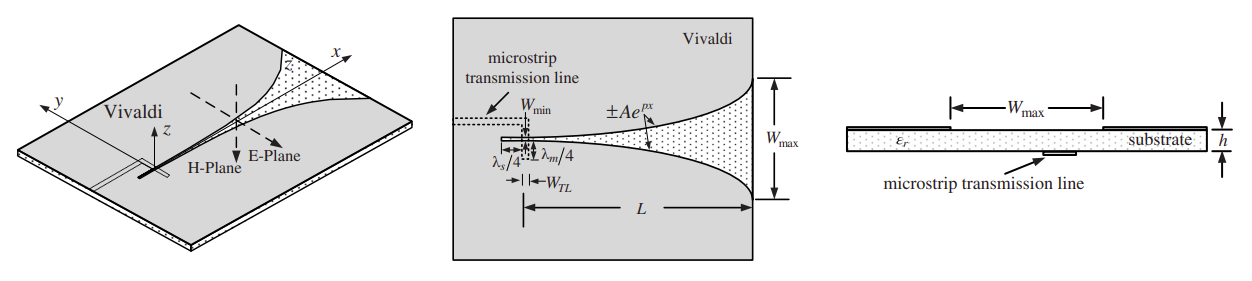


L'antenne Vivaldi est une antenne à ondes progressives à large bande. La structure de base consiste en une slot uniforme λs∕4 qui est connectée à une slot effilée exponentiellement ; l'indice s est utilisé pour identifier la slot.

La fente est excitée/alimentée par une ligne de transmission microstrip à partir de la surface inférieure du substrat, comme le montre la figure ci-dessus.

La conception Vivaldi est généralement peu coûteuse, et elle possède d'excellentes caractéristiques de rayonnement, telles qu'un gain élevé, des performances à large bande, une largeur de faisceau constante et de faibles lobes latéraux.

### Procédure de conception

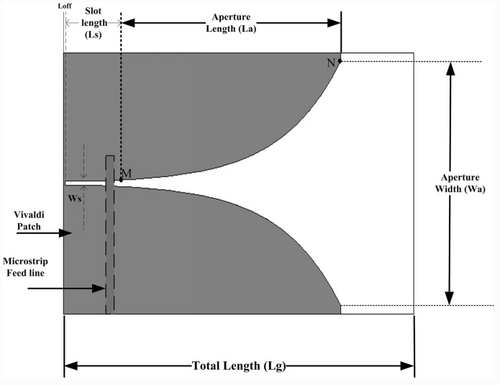

L'antenne est une fente à pente exponentielle découpée dans un film mince de métal qui est supporté par un substrat. La pente exponentielle peut être définie par :

> $ y = \pm  A e^{px} $

Où y est la demi-séparation de la fente et x est la position dans la longueur de l'antenne, A est la moitié de la largeur d'ouverture Wmin, et p est le taux de décroissance.

> $A = \dfrac{W_s}{2}$

> $ p = \dfrac{1}{L_a} \ln{\left ( \frac{W_a}{W_s} \right )}  $

where $L_a$, $W_a$ are the length, the width of the opening aperture and $W_s$ is the slot width of the proposed Vivaldi antenna.

* La directivité des antennes Vivaldi augmente avec la longueur L de l'antenne, ce qui permet d'obtenir des gains allant jusqu'à 17 dB.

* The bandwidth is limited by the opening width Wmin and the aperture width
Wmax of the antenna

* Des études paramétriques ont montré que la performance optimale est atteinte lorsque la longueur L est supérieure à une longueur d'onde à la fréquence la plus basse. 

* La largeur d'ouverture Wmin est basée sur la fréquence la plus élevée et la largeur d'ouverture Wmax influence la fréquence la plus basse. 

En outre, la valeur de la largeur d'ouverture Wmax devrait typiquement, sur la base d'examens paramétriques, être comprise entre Wmax1 et Wmax2, où :



> $W_{max1} = λ_0 = \dfrac{c}{fr \cdot \sqrt(ϵ_r)} $


> $W_{max2} =  \dfrac{  λ_{min} }{2}  = \dfrac{c}{ 2 \cdot f_{min} \cdot \sqrt(ϵ_r)}$

De sorte que $W_{max1}$ < $W_{max}$ < $W_{max2}$, où λmin est la longueur d'onde à la fréquence minimale et λ0 est la longueur d'onde à la fréquence centrale.

> Caractéristiques de l'antenne

Directivité        | Polarisation      | Bande passante
-------------------|-------------------|-----------------
Haut               | Linéaire          | Large


Ref: Balanis, Constantine.“ Broadband Dipoles and Matching Techniques.” Antenna Theory, 4nd Ed.

### [Simulation HFSS] Performances en rayonnement de l’antenne Vivaldi

### Design une antenne Vivaldi

* Substrate FR4 avec $ϵ_r = 4.4$ avec tangente de perte $ξ = 0.02$ et $h = 0.1575 cm$

* Fréquence centrale de $10GHz$ et minimum fréquence est 4 GHz.

$W_{max1}  = λ_0  = \dfrac{c}{fr \cdot \sqrt(ϵ_r)} = 14.3019 mm  $

$W_{max2}  = λ_0  = \dfrac{c}{ 2  fr \cdot \sqrt(ϵ_r)} = 17.8774 mm  $

### Codes - Design parametres

In [1]:
from ipywidgets import interact
import numpy as np

print( 'Definir les parametre h(mm), fr(GHz) et er:')
@interact(fmin=(1, 20, 0.01), fc=(1, 20, 0.01), er=(2.2, 12, 0.01), h = (0.05, 5, 0.01,))
def dimension_patch_carre(fc,er,h, fmin):
  c = 3*10**8
  fmin = fmin*10**9
  fc = fc*10**9
  lamb = c/fc
  h = h*10**(-3)
  
  w_max1 = (c/(fc*np.sqrt(er))) * 10**3
  w_max2 = (c/(2*fmin*np.sqrt(er))) *10**3
  print('w_max1 = ',np.round(w_max1,4),'mm \n')
  print('w_max2 = ',np.round(w_max2,4),'mm \n')

  TL = (lamb/2) 
  #Ws doit etre aproxi 1mm
  Ws = 0.6*10**(-3)
  s = Ws/2
  #p = 250
  #Wa = Ws* np.exp(p*TL) 
  Wa = 16*10**(-3)
  p = 1/TL * np.log(Wa/Ws)
  print(TL,Ws,Wa,p, s)

Definir les parametre h(mm), fr(GHz) et er:


interactive(children=(FloatSlider(value=10.0, description='fc', max=20.0, min=1.0, step=0.01), FloatSlider(val…

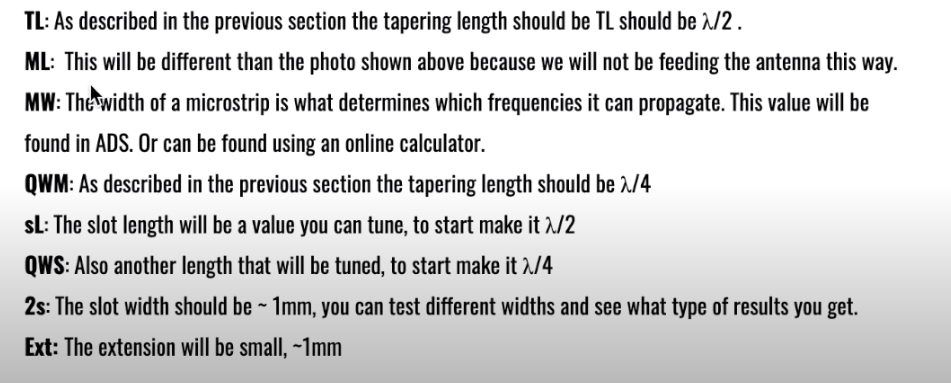


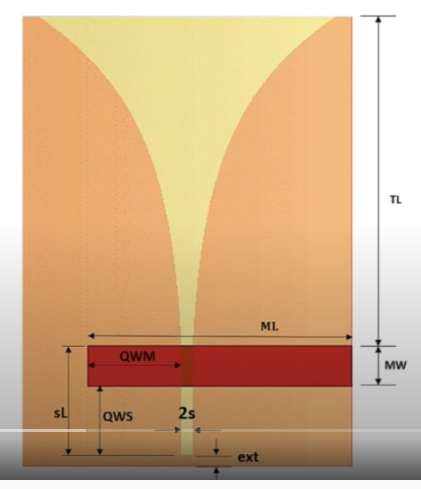

# **Antennes indépendantes de la fréquence: Spirales et log-périodiques**

Une antenne dont l'impédance d'entrée est indépendante de la fréquence est appelée antenne à impédance constante. Certaines antennes à impédance constante ont des caractéristiques de rayonnement qui sont indépendantes de la fréquence.

Ces antennes, qui ont à la fois une impédance d'entrée constante et des caractéristiques de rayonnement constantes, sont appelées antennes indépendantes de la fréquence.


## Log Periodic Toothed - Design Parameters

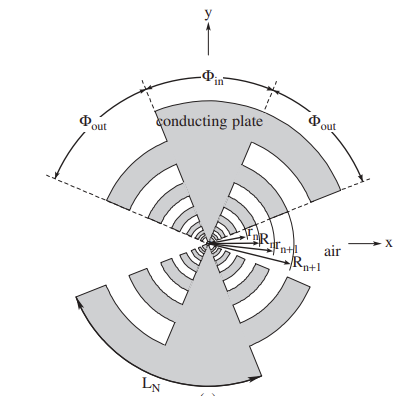


 Procédure de conception - Dimension de l'antenne

* L'antenne est spécifiée avec le paramètre d'expansion ξ , le paramètre de largeur de dent τ , l'angle intérieur $\Phi_{in}$, et l'angle extérieur $\Phi_{out}$, où :

> $\xi =  \dfrac{ R_{n+1}}{ R_{n}}$

> $\tau = \dfrac{r_n}{R_n} $

 * Où le nombre maximal de dents et la somme des angles d'entrée et de sortie sont fixés respectivement à N = 6 et $\Phi _{in} + \Phi _{out}  = 90◦$ .



## [Simulation HFSS] Performances en rayonnement de l’antenne log periodique toothed

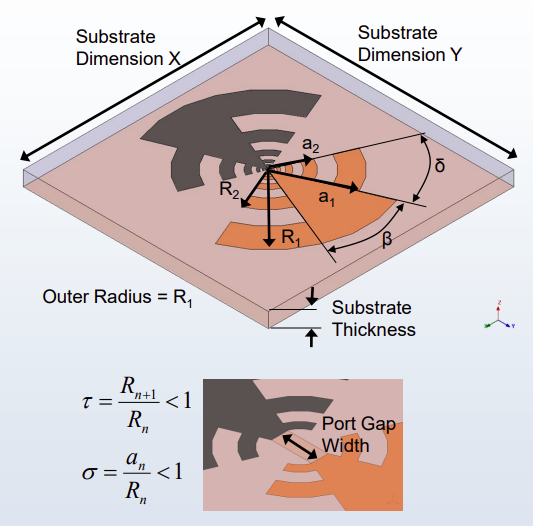

>Caractéristiques de l'antenne

Directivité        | Polarisation      | Bande passante
-------------------|-------------------|-----------------
Moyen              | Linéaire          | Large




In [ ]:
#codes

##Planar Log-Spiral - Design Parameters


# **Antennas for Mobile Communications**

## **Planar Inverted-F Antenna (PIFA)**

L'antenne planaire en F inversé (PIFA) est une conception très populaire dans les communications mobiles. Son nom est dû à la ressemblance de la lettre F avec sa face cachée dans sa vue latérale. La PIFA intrinsèque est fondamentalement un dérivé du microruban rectangulaire λ/4 de la figure en dessus:


Ref: Balanis, Constantine. “Microstrip Antennas.” Antenna Theory, 4nd Ed.

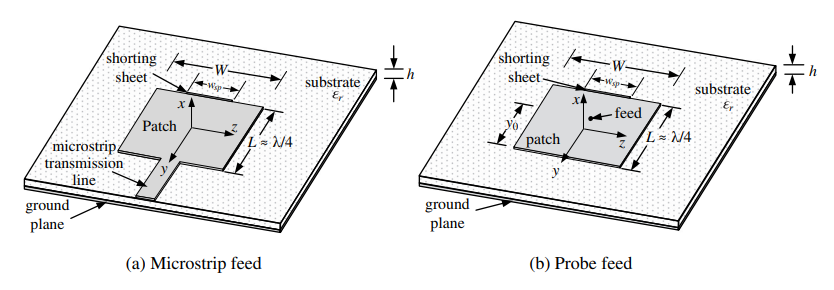

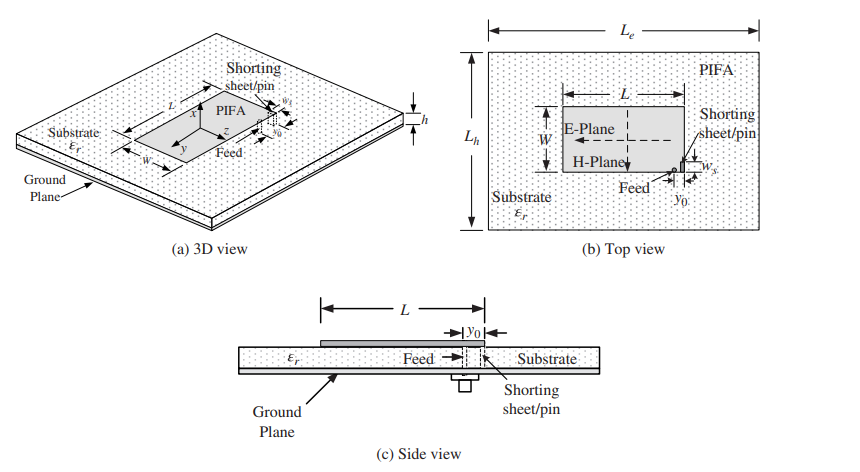

> Parmi ses avantages, on peut citer les suivants:

* Le faible rayonnement vers l'arrière réduit le débit d'absorption spécifique (DAS) par rapport aux autres types d'antennes utilisées dans les applications mobiles.

* Les deux polarisations, verticale et horizontale, peuvent être captées.

* Il peut être facilement intégré dans les appareils mobiles.

* Il est facile à concevoir, son coût est faible et il est fiable.


### Procédure de conception

>$L = -W + W_s + \lambda / 4 + h$

où λ est la longueur d'onde dans le diélectrique.

> $L =  \lambda/4 + h $ pour $w_s=W$

> $L ≈ -W +  \lambda / 4 + h $ pour $w_s ≈ 0$

**Fréquence de résonance**

La fréquence de résonance de l'antenne PIFA est déterminée par la longueur du patch $L$, la largeur du patch $W$, la largeur de la feuille de court-circuit $w_s$ et la hauteur du substrat $h$.

> $f_r = \dfrac{c}{4 \cdot (L+W-w_s-h)\sqrt(𝜀_r)} $

où **c** est la vitesse de la lumière dans l'espace libre et $𝜀_r$ est la permittivité relative (constante diélectrique) du substrat.

### Codes Design Parametres

In [ ]:
print( 'Definir les parametre h(mm), fr(GHz) et er:')
@interact(fc=(1, 20, 0.05), er=(2.2, 12, 0.01), h = (0.05, 5, 0.01))
def dimension_patch_circulaire(fc,er,h):
  c = 3*10**8
  fc = fc*10**9
  hh = h*10**(-3)
  #---------------------------------------------------------------------------
  lamb = c/(fc*np.sqrt(er))

  L = (lamb/4) + hh
  
  print('L du patch:',np.round(L*100,4),'cm\n')

Definir les parametre h(mm), fr(GHz) et er:


interactive(children=(FloatSlider(value=10.0, description='fc', max=20.0, min=1.0, step=0.05), FloatSlider(val…

### [Simulation HFSS] Performances en rayonnement de l’antenne PIFA

### Performances en rayonnement

In [ ]:
df_patch(4.97,3.9643,1,10,-20.06,0.4178)

                              0           1
0         Surface effective mm²  178.427851
1                   Directivite    4.970000
2                          Gain    3.964300
3      Pertes de lantenne (ecd)    0.797646
4  Pertes des désadaptation(dB)  -20.060000
5           Bande passante(GHz)    0.417800
6             Bande passante(%)    4.178000


Critères de performance                | Résultats 
---------------------------------------|----------------------
Surface effective Se                   | 178.42 $mm^2$
Directivité($Φ=90°,Θ=0°$)              | 4.97 dBi
Gain($Φ=90°,Θ=0°$)                     | 3.9643 dBi
Pertes de l’antenne ($e_{cd}$)         | 0.7976
Pertes des désadaptions ($S_{11}$)     | -20.06 dB
Bande passante (-10 dB)                | 0.4178 GHz 
Bande passante (%)                     | 4.17 % 


> Caractéristiques de l'antenne

Directivité        | Polarisation      | Bande passante
-------------------|-------------------|-----------------
Moyen              | Linéaire          | Étroite

### Paramètre $s_{11}$ : Coefficient de réflexion

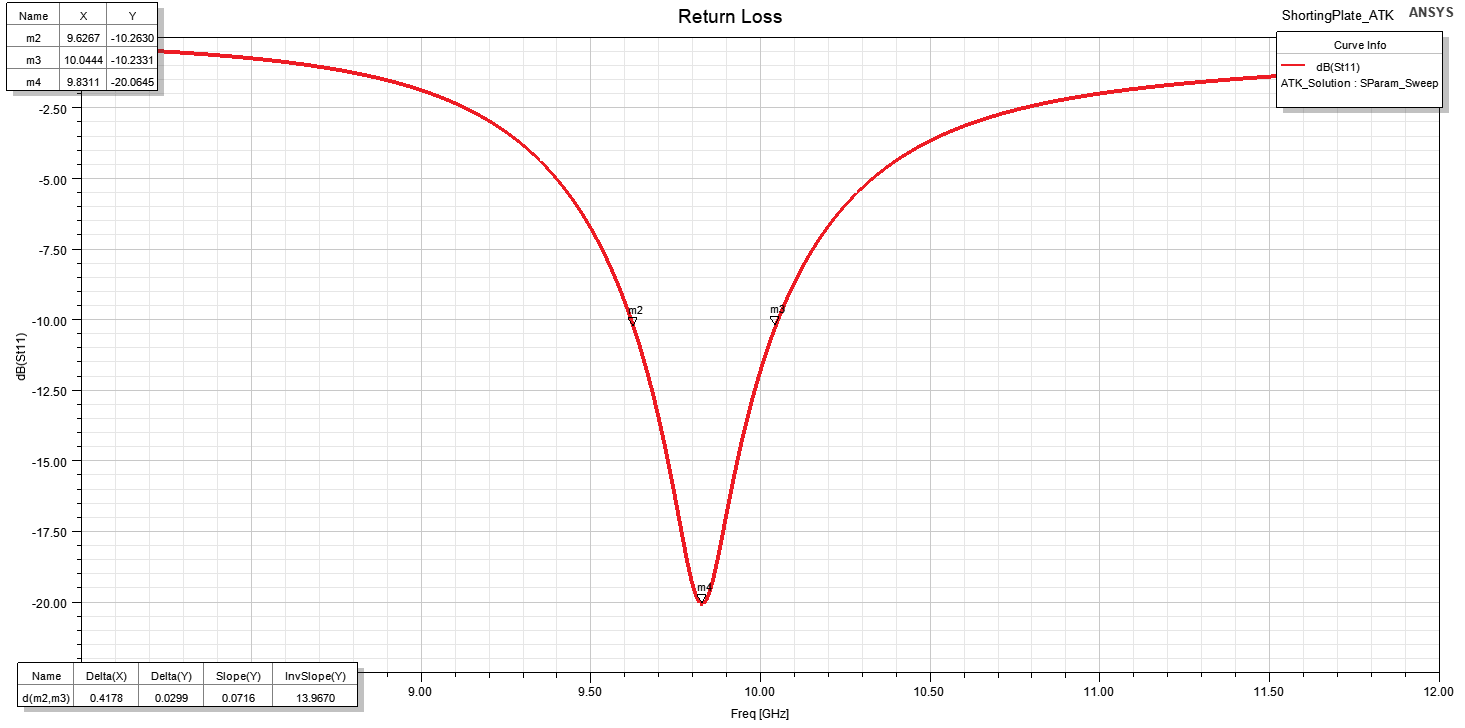

### Diagramme de rayonnement

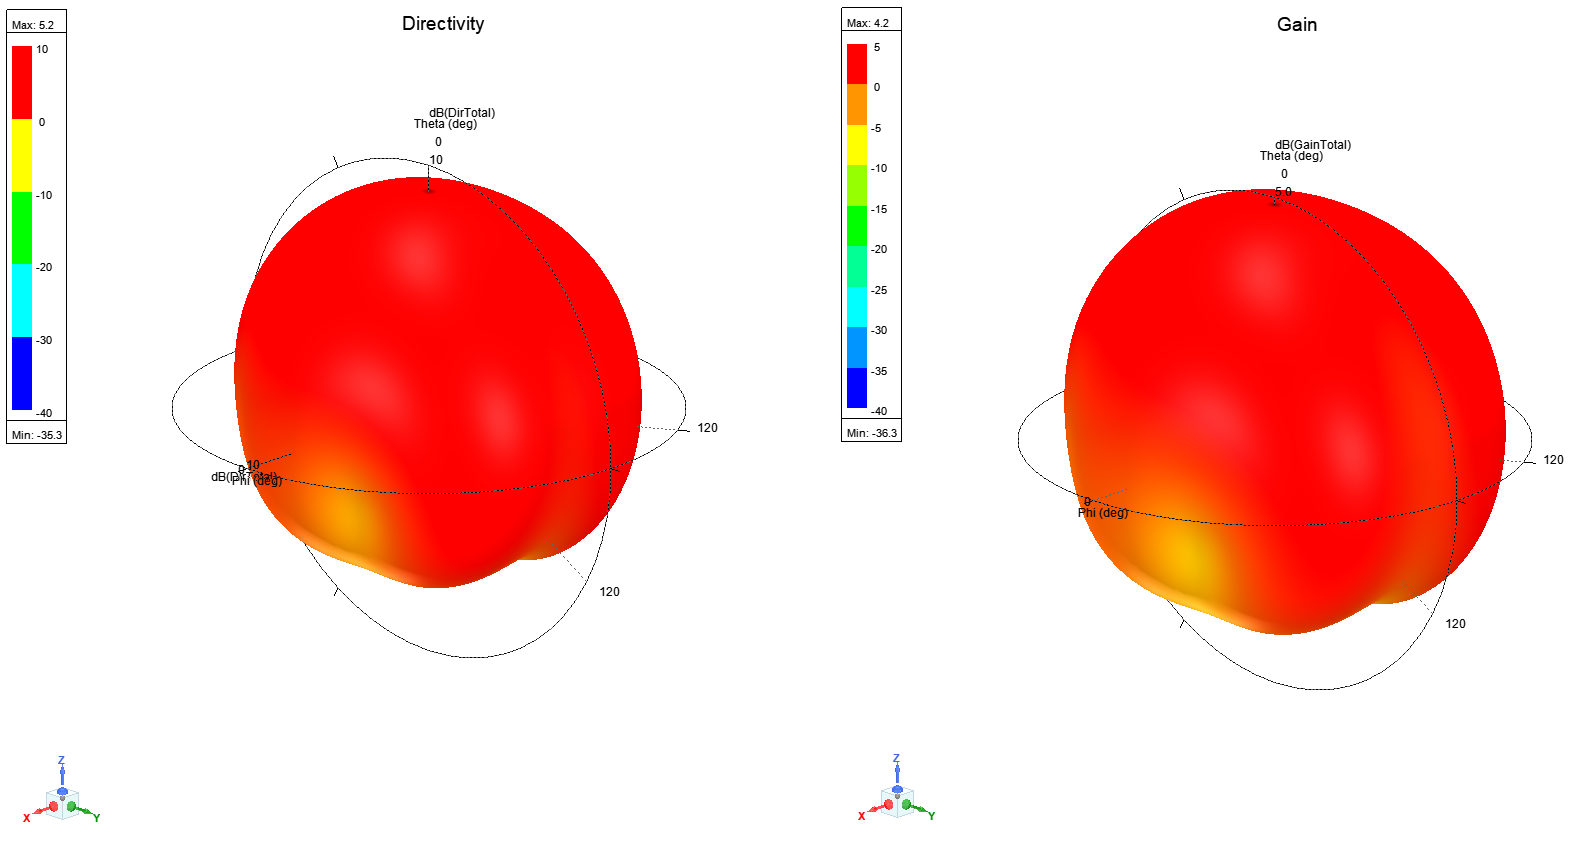

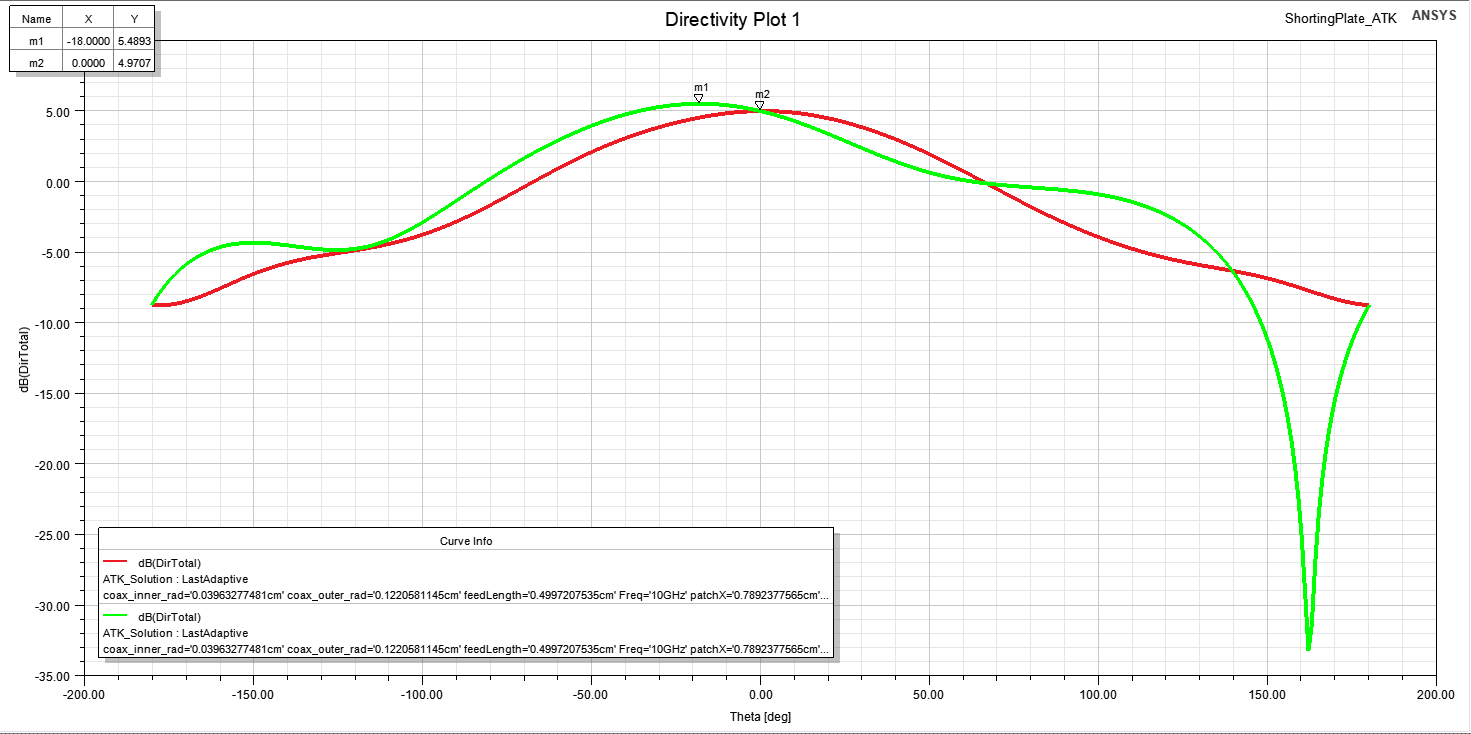

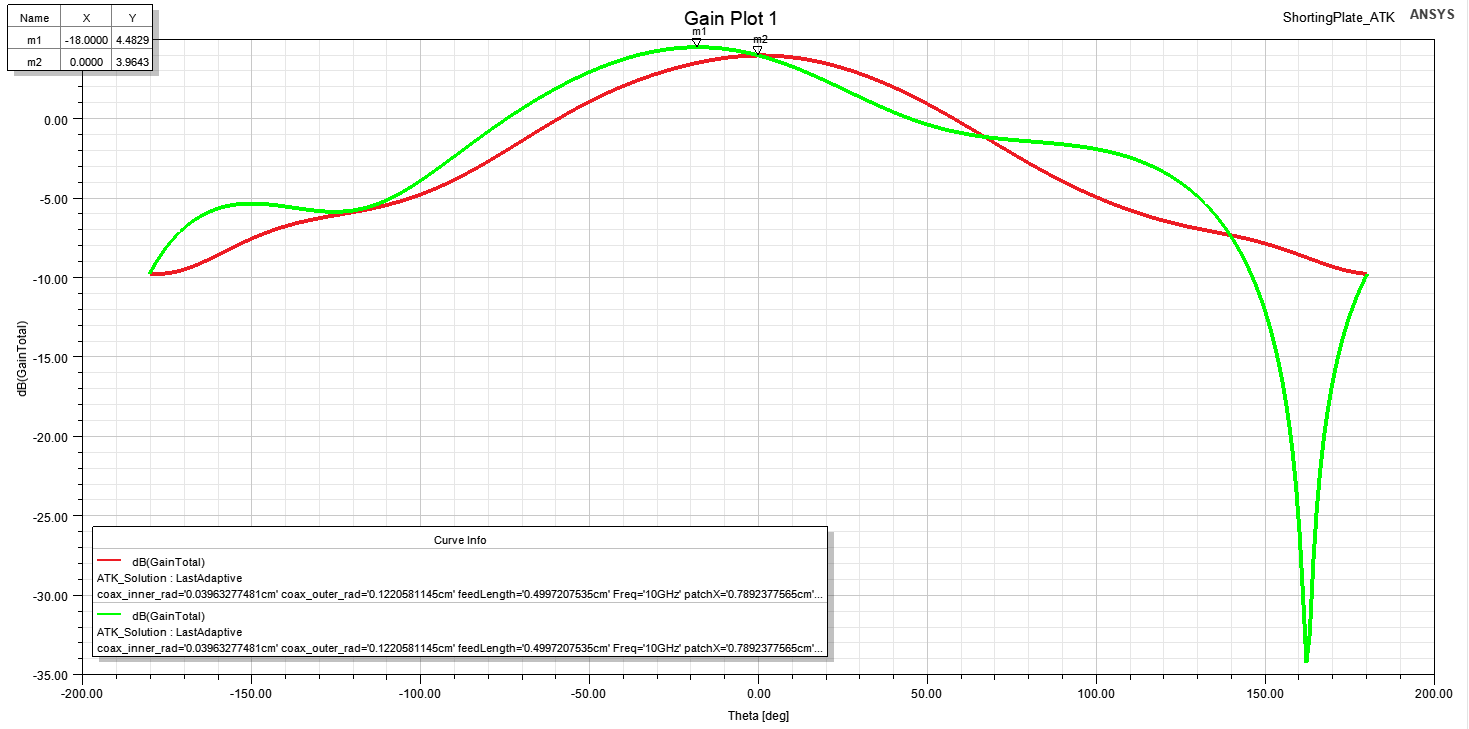

## **Microstrip patch Bow-tie**

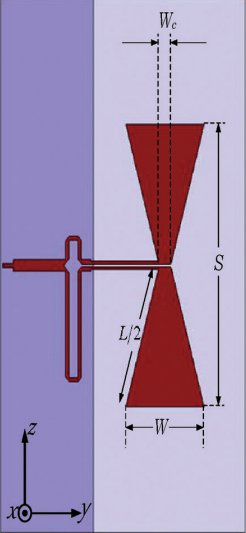


>Caractéristiques de l'antenne

Directivité        | Polarisation      | Bande passante
-------------------|-------------------|-----------------
Faible             | Linéaire          | Modere




### Procédure de conception

L'antenne Bow-tie est similaire à la conception des patchs microstrip rectangulaires. Il existe un ensemble d'équations de conception, qui sont obtenues en modifiant les équations de conception semi-empiriques pour les patchs rectangulaires.


> $(f_r)^{TM}_{10}  =  \dfrac{1}{2 \sqrt{e_{ereff}}L} \left ( \frac{1.152}{R_t} \right )  $


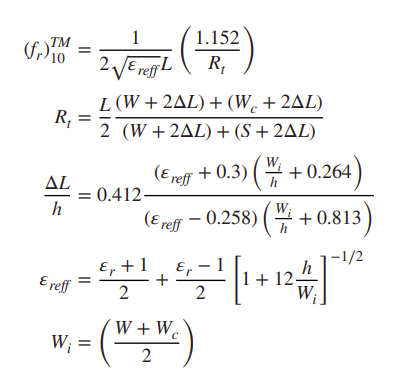







###[Simulation HFSS] Performances en rayonnement de l’antenne bow-tie

# **Bilan des donnés**

* **Critères de performance**  

Antennes|Surface effective|Directivité|Gain|Pertes de l’antenne ($e_{cd}$)|Pertes des désadaptions ($S_{11}$)|Bande passante (-10 dB)|Bande passante(%) 
--|--|--|--|--|--|--|--
Patch rectangulaire avec ligne $λ/4$ feed|251.78 $mm^2$|6.61 dBi |5.46 dBi|0.8260|-16.31 dB|bp10|bp percent
Patch rectangulaire avec insert feed|238.61 $mm^2$|6.62 dBi|5.23 dBi|0.7893|-19.23 dB|bp10|bp percent
Patch rectangulaire avec coaxial feed|306.69 $mm^2$|7.21 dBi|6.52 dBi|0.9262|-25.86 dB|bp10|bp percent
Patch circulaire avec coaxial feed|260.3410 $mm^2$|6.41 dBi|5.60 dBi|0.8749|-18.63 dB|bp10|bp percent
Patch Elliptique avec coaxial feed|246.78 $mm^2$|6.34 dBi|5.37 dBi|0.8476|-31.88 dB|bp10|bp percent
Planar Inverted-F Antenna (PIFA)|178.42 $mm^2$|4.97 dBi|3.96 dBi|0.7976|-20.06 dB|0.42 GHz|4.20%

## Resultats et analyses

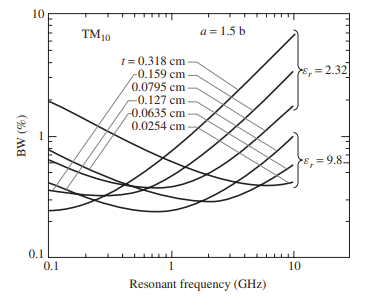


Largeurs de bande de microbandes rectangulaires avec différentes épaisseurs de substrat et deux constantes diélectriques.

# **Réseaux d'antennes**

## Introdution




Une autre façon d'augmenter les dimensions de l'antenne, sans nécessairement augmenter la taille des éléments, consiste à former un ensemble d'éléments rayonnants dans une configuration électrique et géométrique.

 Cette nouvelle antenne, formée de plusieurs éléments, est appelée un réseau. Dans la plupart des cas, les éléments d'un réseau sont identiques. Ce n'est pas nécessaire, mais c'est souvent pratique, plus simple et plus pratique. Les éléments individuels d'un réseau peuvent être de n'importe quelle forme (fils, ouvertures, etc.).

Le champ total du réseau est déterminé par l'addition vectorielle des champs rayonnés par les éléments individuels.


Dans un réseau d'éléments identiques, il existe au moins cinq commandes qui peuvent être utilisées pour façonner le diagramme global de l'antenne. 

* La configuration géométrique de l'ensemble du réseau (linéaire, circulaire, rectangulaire, sphérique, etc.)
* Le déplacement relatif entre les éléments
* L'amplitude d'excitation des éléments individuels
* La phase d'excitation des éléments individuels
* Le diagramme relatif des éléments individuels


Un réseau d'éléments identiques, tous de magnitude identique et chacun avec une phase progressive, est appelé réseau uniforme. Le facteur de réseau peut être obtenu en considérant les éléments comme des sources ponctuelles. Si les éléments réels ne sont pas des sources isotropes, le champ total peut être formé en multipliant le facteur de réseau des sources isotropes par le champ d'un seul élément. C'est la règle de multiplication du réseau de l'équation ci-dessous, et elle ne s'applique qu'aux réseaux d'éléments identiques.



> `E(total) = [E(single element at reference point)] × [array factor]`



Dans la conception de tout système d'antenne, les **paramètres de conception** les plus importants sont généralement:

* Le nombre d'éléments;
* L'espacement entre les éléments;
* L'excitation (amplitude et phase);
* La largeur du faisceau à mi-puissance;
* La directivité ;
* Le niveau des lobes secondaires;

Dans une procédure de conception, certains de ces paramètres sont spécifiés et les autres sont ensuite déterminés

## Réseau Lineaire

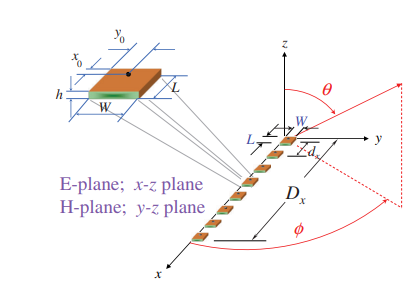

## Réseau  planaire

Les réseaux planaires fournissent des variables supplémentaires variables supplémentaires qui peuvent être utilisées pour contrôler et façonner la configuration du réseau.

Les réseaux planaires sont plus polyvalents et peuvent fournir des modèles plus symétriques avec des lobes latéraux plus faibles. En outre, ils peuvent être utilisés pour balayer le faisceau principal de l'antenne vers n'importe quel point de l'espace. 

Les applications comprennent les radars de localisation, les radars de recherche, la télédétection, les communications, et bien d'autres.



>**Array Factor** 




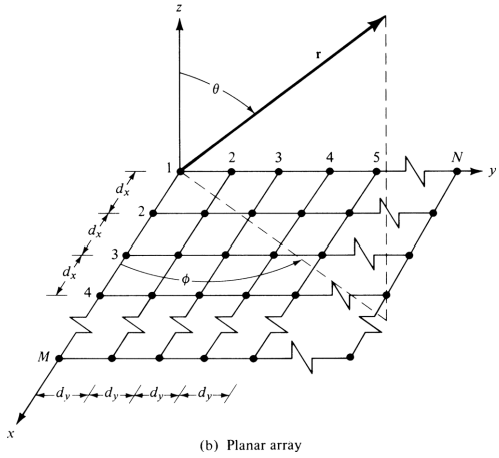

Le facteur de réseau pour l'ensemble du réseau planaire peut s'écrire comme suit:

> $AF = S_{xm} S_{yn} $

où:

> $S_{xm} = \sum_{m=1}^{M} I_{m1} \cdot e^{j(m-1)(k d_x \sin \theta \cos \phi + \beta_x)} $

> $S_{yn} = \sum_{n=1}^{N} I_{1n} \cdot e^{j(n-1)(k d_y \sin \theta \sin \phi + \beta_y)}   $

* $I_{m1}$ :  le coefficient d'excitation de chaque élément;

* $d_x et \beta_x) $: La distance et le déphasage progressif entre les éléments le long de l'axe x; 




Si les coefficients d'excitation d'amplitude des éléments du réseau dans la direction y sont proportionnels à ceux dans la direction x, l'amplitude du (m, n)ème élément peut s'écrire comme suit :


> $ I_{mn} = I_{m1} I_{1n}$

Si en plus l'excitation d'amplitude de l'ensemble du réseau est uniforme, ça veut dire:

> $I_{mn} = I_0$

On peut calculer la AF comme suit:

> $AF_n(\theta ,\phi ) = \left \{ \dfrac{1}{M} \dfrac{\sin \left ( M/2 \cdot \Psi_x \right )}{\sin \left ( \Psi_x/2 \right )}\right \} \left \{ \dfrac{1}{N} \dfrac{\sin \left ( N/2 \cdot \Psi_y  \right )}{\sin \left ( \Psi_y/2 \right )} \right \}$

où:

* $\Psi_x = k d_x  \sin \theta \cos \phi + \beta_x$

* $\Psi_y =  k d_y  \sin \theta \sin \phi + \beta_y$

> **Lobes secondaires** 

Pour éviter les lobes secondaires dans les plans x-z et y-z, la distance entre les éléments dans les directions x et y, respectivement, doit être inférieure à $\lambda$ ($d_x < \lambda$ et $d_y < \lambda$) ;


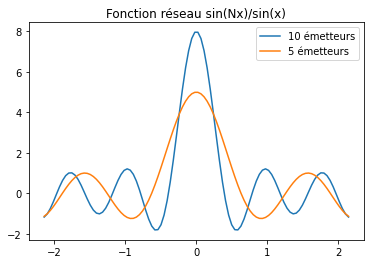

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N1 = 8
N2 = 5

theta = np.linspace(-np.pi + 1, np.pi - 1, 100)

f1 = np.sin(N1 * theta)/ np.sin(theta)
f2 = np.sin(N2 * theta)/ np.sin(theta)

#f1 = 20*np.log10(f1)

plt.plot(theta, f1, label="10 émetteurs")
plt.plot(theta, f2, label="5 émetteurs")

plt.title("Fonction réseau sin(Nx)/sin(x)")
plt.legend()
plt.show()

### Procédure de conception

* Les réseaux planaires conçus dans cette section sont composés uniquement de patchs rectangulaires. 

* Les réseaux planaires de 8 × 8 éléments de patchs microstrip rectangulaires avec un espacement entre éléments de λ/2.

* Le nombre d'éléments d'un réseau affecte la largeur du lobe principal d'un diagramme de rayonnement. En d'autres termes, plus il y a d'éléments dans un réseau (réseau de grande taille), plus le lobe principal est étroit.

> **Réseau planaire 8x8**




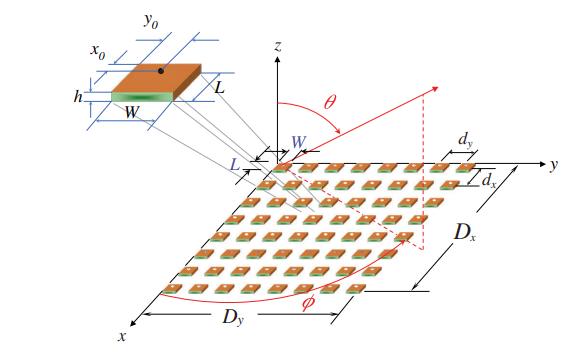

Finite Array Domain Decomposition (ou FADDM) profite de la simplicité des cellules unitaires et crée un modèle complet en utilisant les informations de maillage générées dans une cellule unitaire.

Dans une cellule unitaire, les hypothèses suivantes sont faites :

* Le motif de chaque élément est identique;
* Le réseau est uniformément excité en amplitude, mais pas nécessairement en phase;
* Les effets de bord et le couplage mutuel sont ignorés;



> **Layout réseau 8x8 dans HFSS**



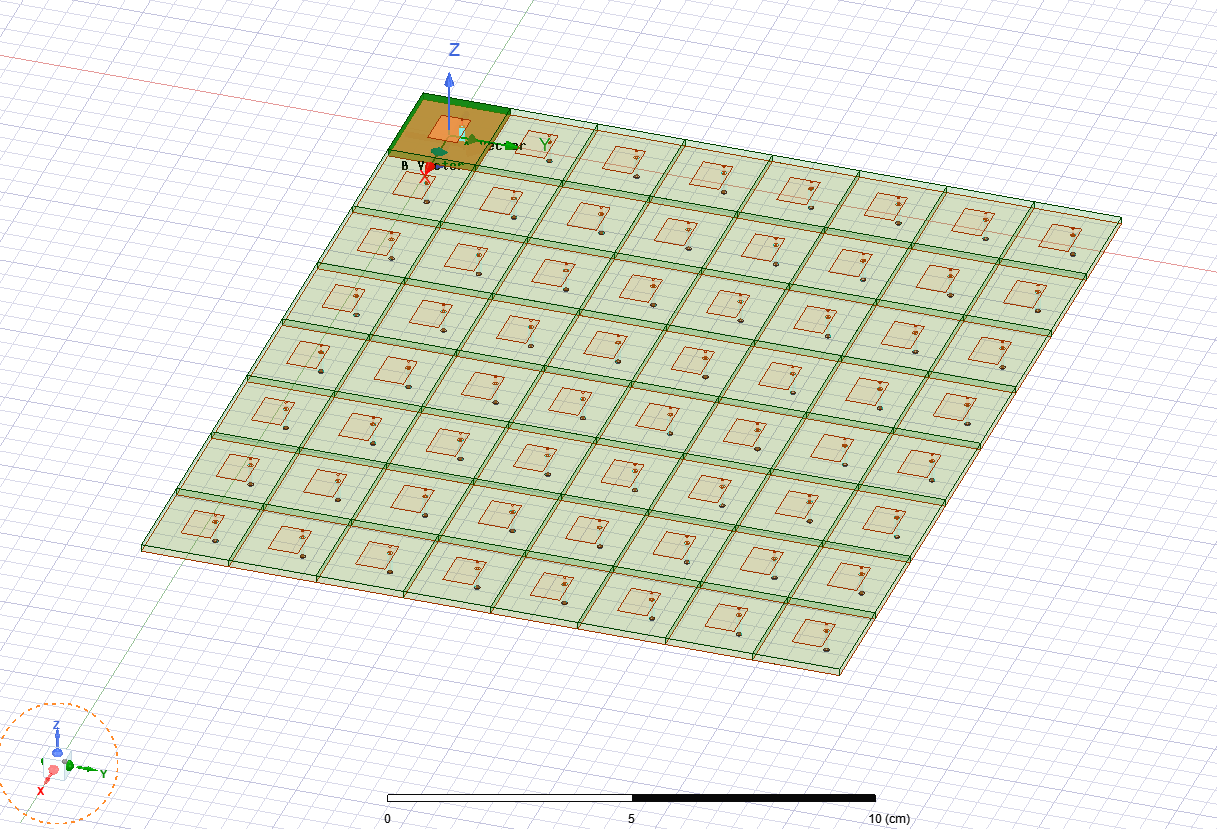

* $Dx$:
* $Dy$:
* $dx$: 15 mm
* $dy$: 15 mm
* $W$: 0.91 cm
* $L$: 0.64 cm
* $h$: 1.58 cm
* $x_0$: 4.5 cm
* $y_0$: 46 cm
* $tan\delta$: 0.02
* $ϵ_r$: 4.40
* $f$: 10GHz

* **Performances en rayonnement**

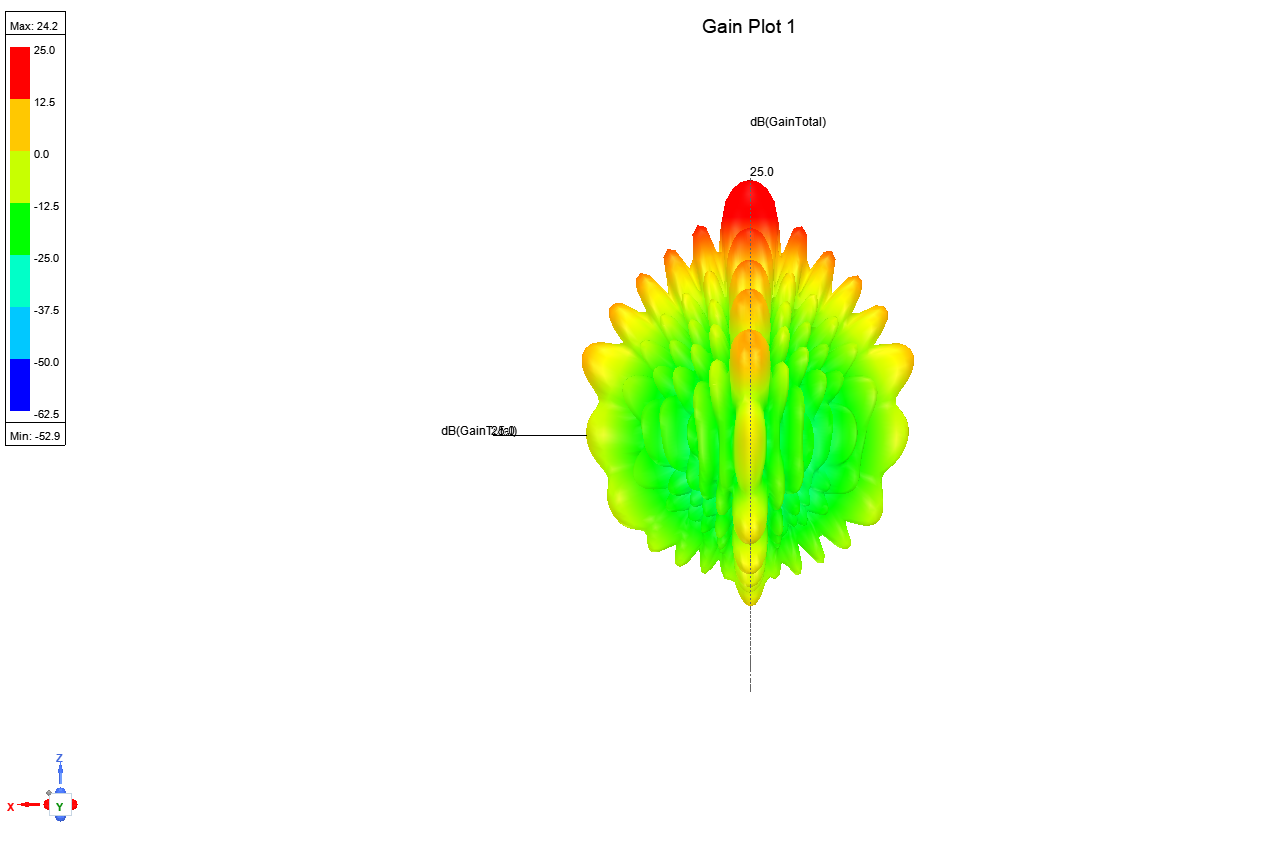

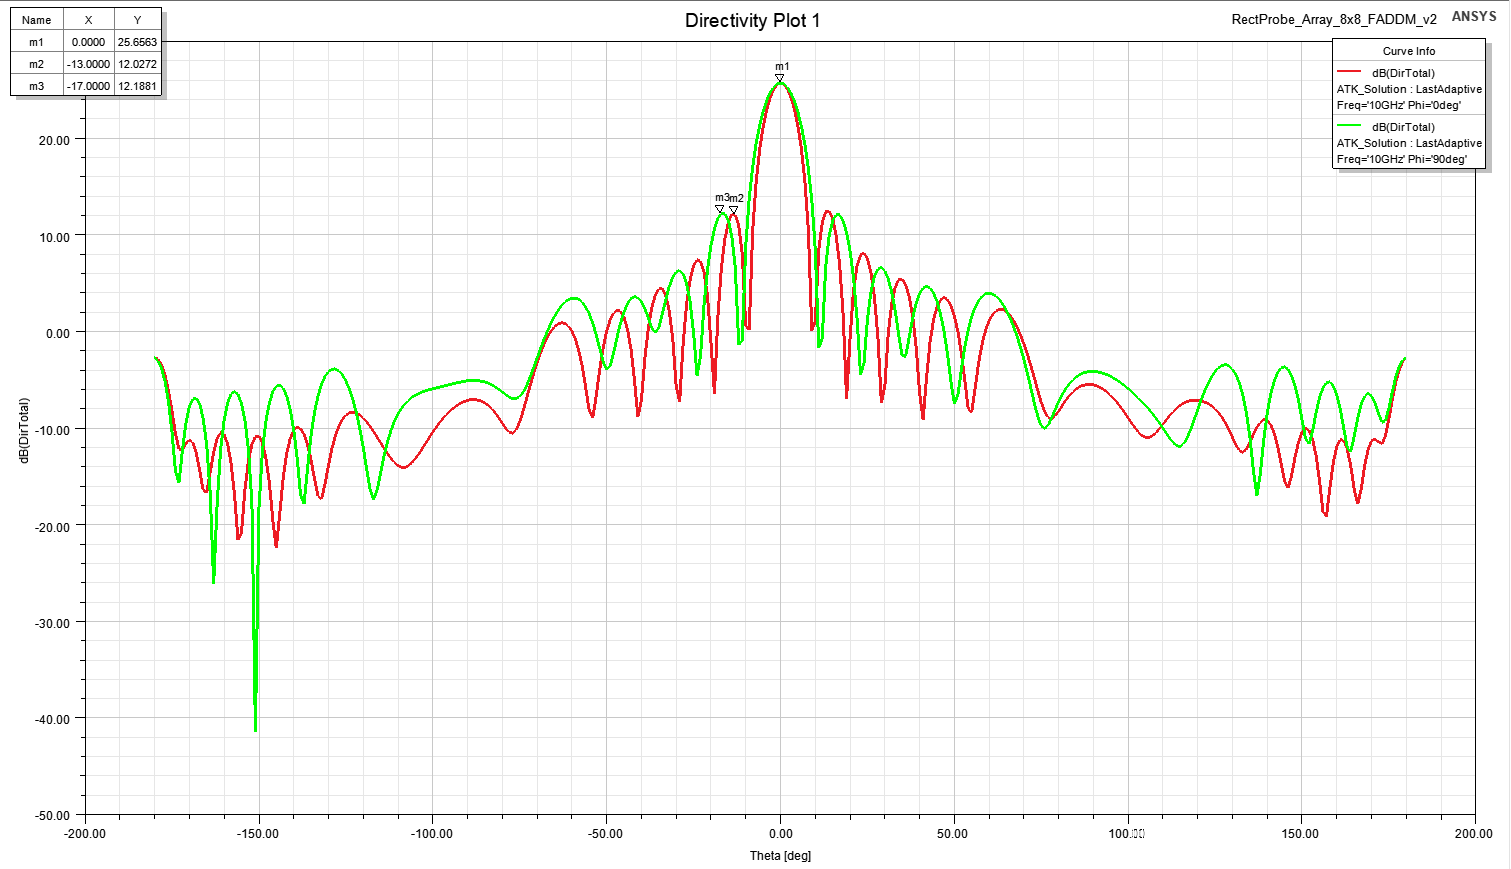

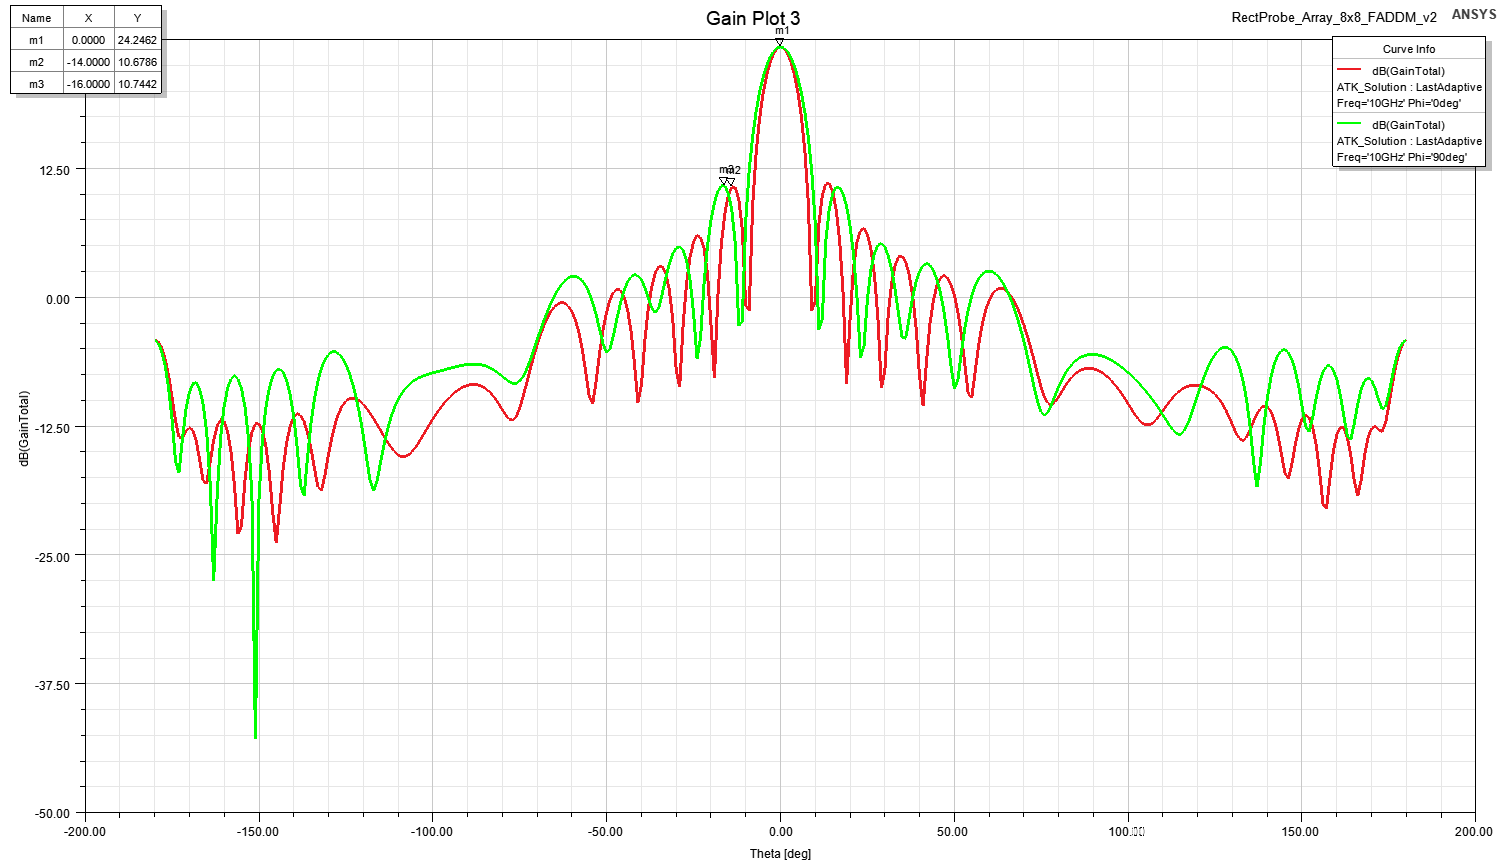

* **Comparaison 1 seule element rayonnent x réseau 8x8**

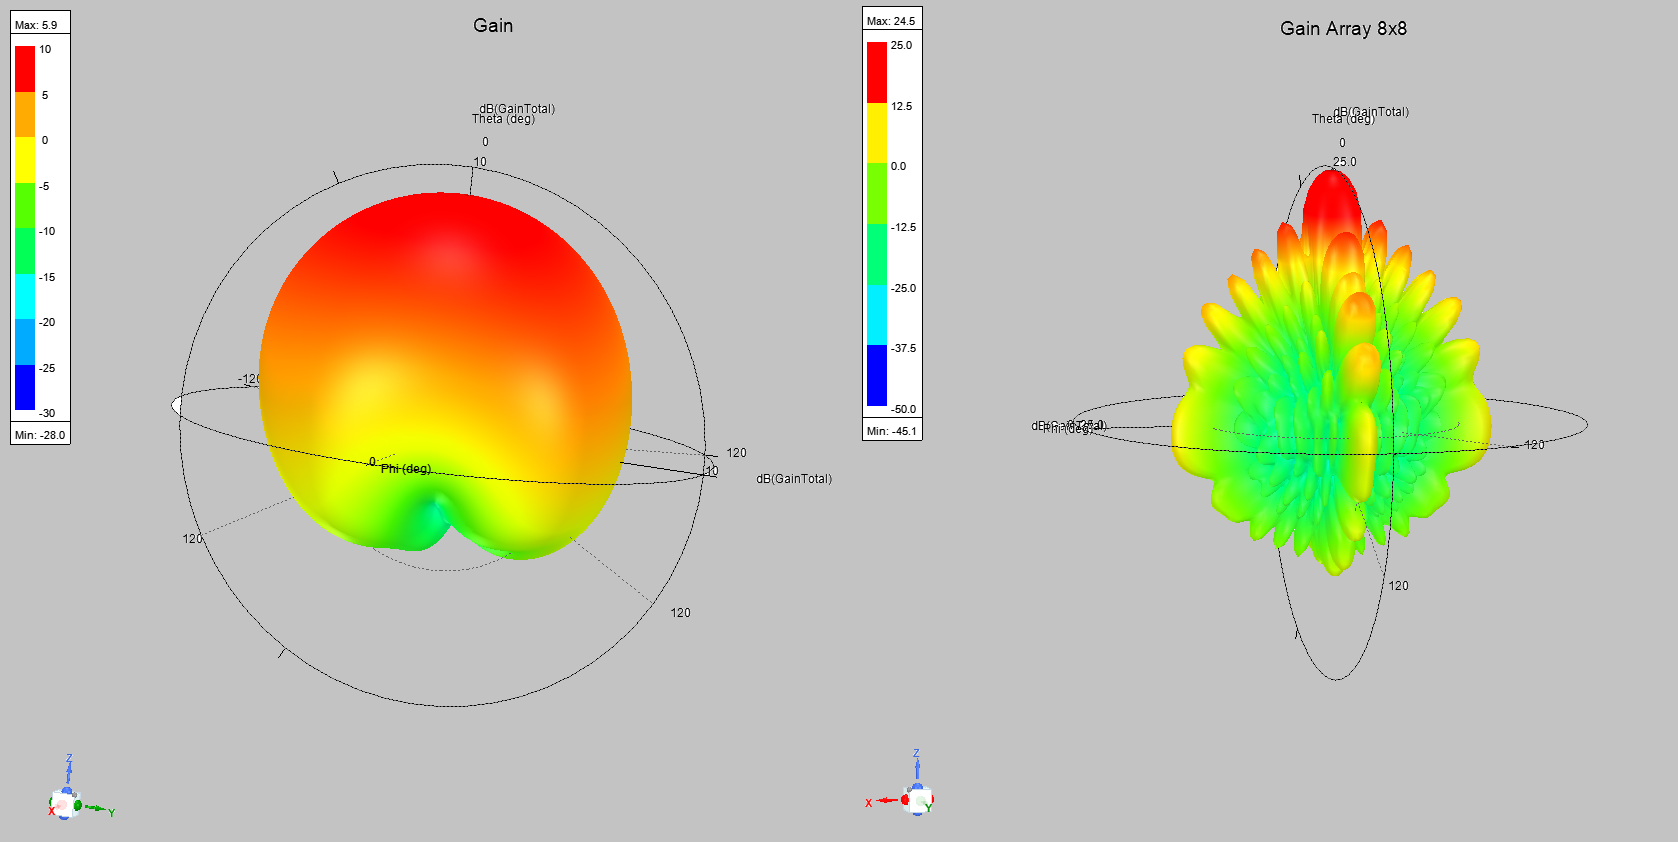

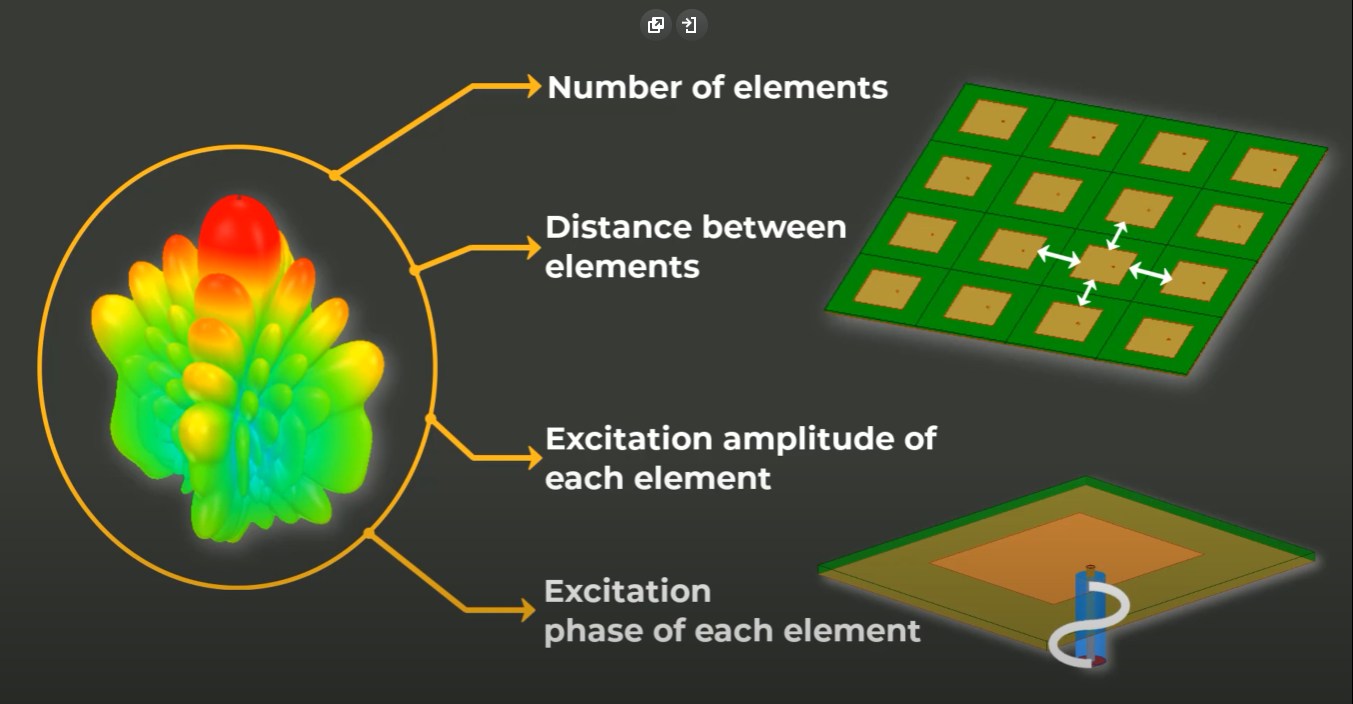

* Si on defini le parametre Scan_theta = 10° , on regarde que on peux focaliser le lobe principal à 10°:

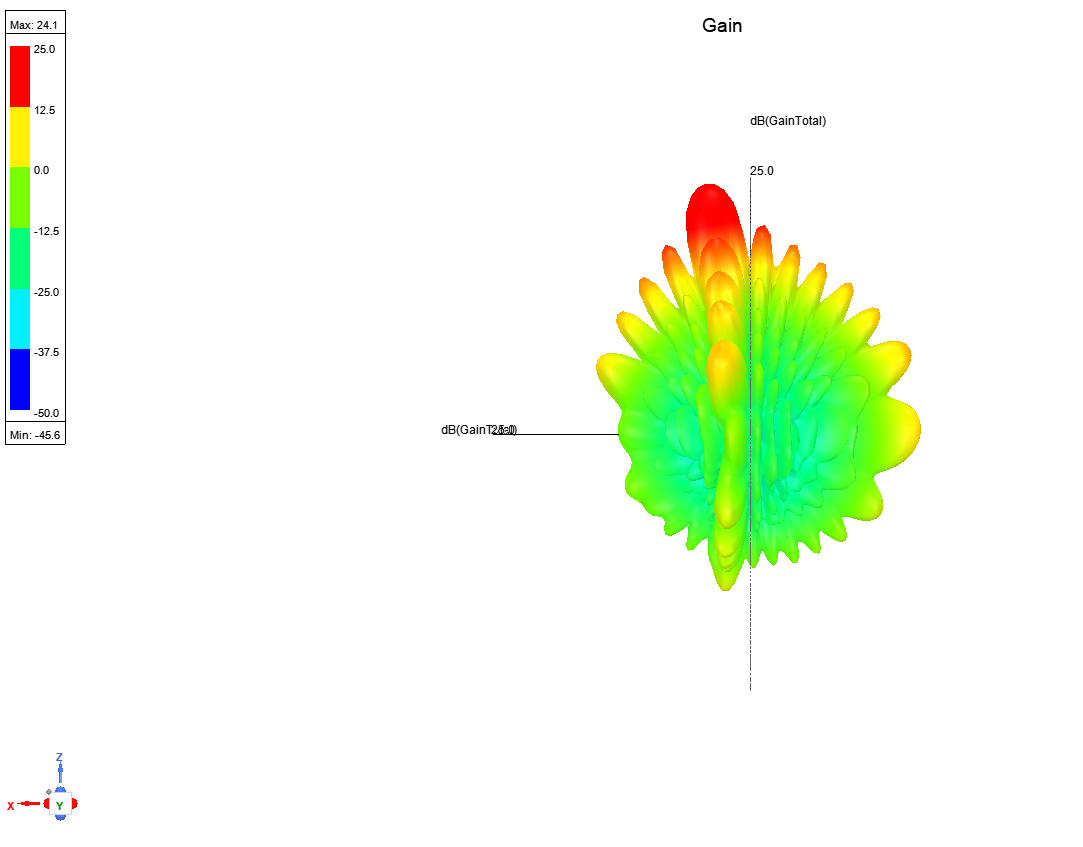

* **Paramètre  s11  : Coefficient de réflexion**

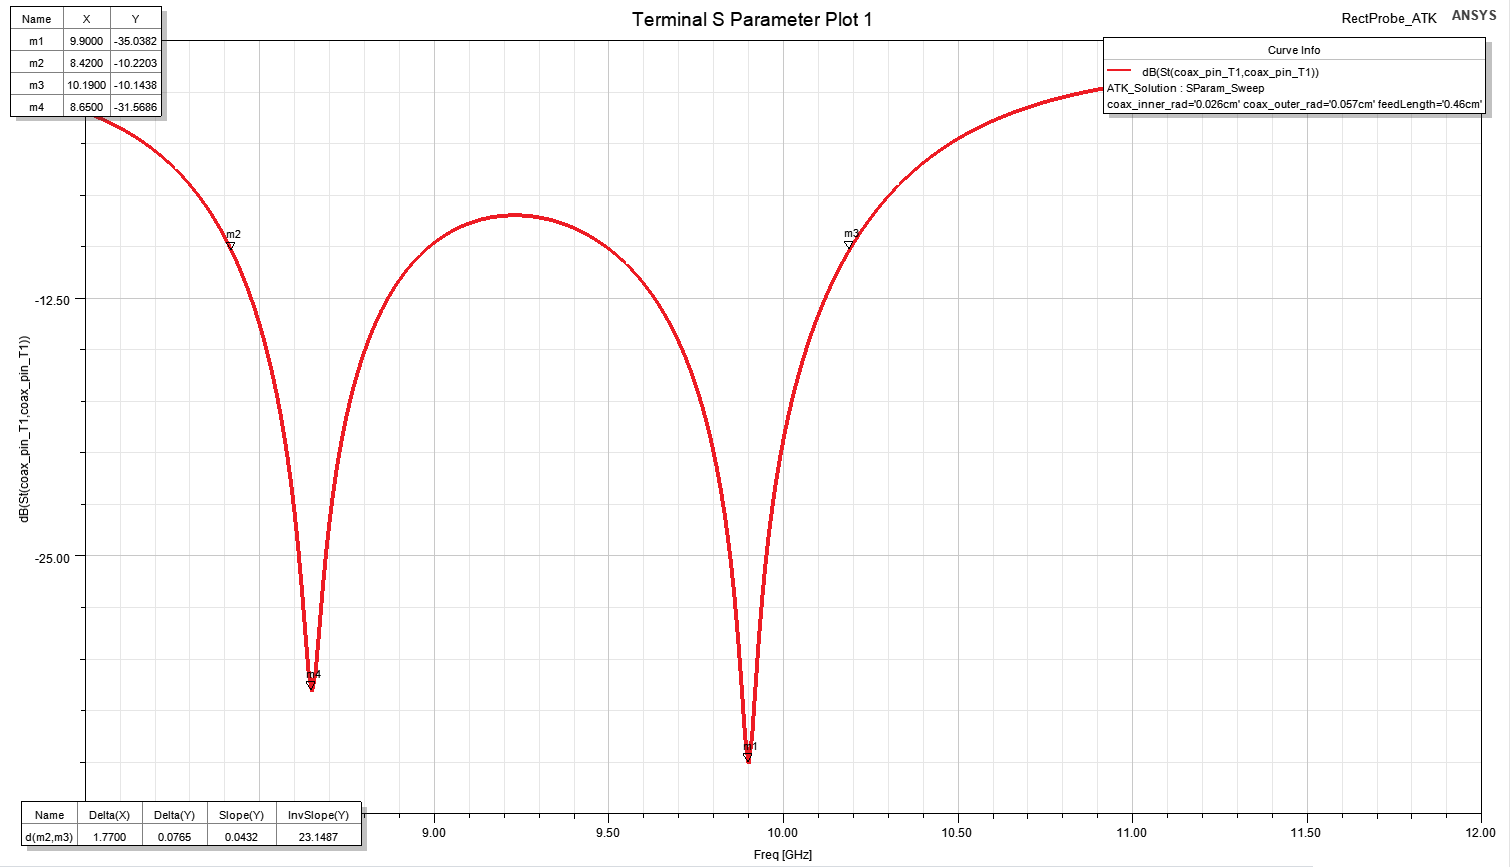

# Références bibliographiques

Balanis, Constantine. “Microstrip Antennas.” Antenna Theory, 4nd Ed.


Balanis, Constantine. “Traveling Wave and Broadband Antennas.” Antenna Theory, 4nd Ed.


JOHNSON, R. C.; JASIK, H. Antenna engineering handbook. New York ; London: Mcgraw-Hill, 1984.

‌